In [2]:
# import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
# from epidemiologicalModels import *

## Modelo $SIS$ en autómatas y una comparación con el modelo clásico

### Comparación entre el modelo clásico y la implementación en autómatas celulares

*   **La enfermedad A:** Cuenta con una tasa de recuperación $\alpha$ del $20\%$, mientras que su tasa de infección $\beta$ es del $5\%$.

Se analizó en un periodo de 30 días (si tomáramos como unidad de tiempo base a los días) tanto en el modelo clásico, como en la implementación del modelo $SIS$ en autómatas celulares, tomando una población inicial de individuos infectados del $10\%$. 

De acuerdo con lo descrito en [5], la enfermedad tenderá a desaparecer de la población debido a que el indicador $R_0=\frac{\beta}{\alpha}=0.25< 1$, los resultados obtenidos en ambos modelos se describen en la siguiente figura:

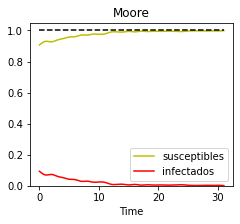

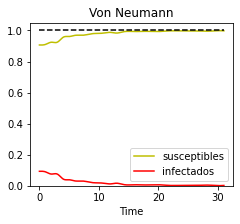

In [4]:
a=0.2; b=0.05
system = initialCondition(0.1, np.zeros((30,30)))
SM = models("sis",a,b,system,Moore)
SVN = models("sis",a,b,system,Von_Neumann)

plt.subplot(1,2,1)
SM.metricsPlot(30,"Moore")

plt.subplot(1,2,1)
SVN.metricsPlot(30,"Von Neumann")

![texto del enlace](https://docs.google.com/drawings/d/e/2PACX-1vQfs6GNzJyFyUJ1dqiWLnbSLHW9exyAKCXkkfCR5MIuZBSm5SmSa7IkaULhd2YvkHzY8Q9Cey32KuFe/pub?w=713&h=526)

Para el caso de la implementación en autómatas celulares se tomo una población de 900 individuos (sistema $30\times30$) y se observaron diferentes evoluciones basados en diferentes condiciones iniciales, tomemos por ejemplo una enfermedad cuyas tasas de infección y recuperación estén dadas por $\beta=0.3$ y $\alpha=0.2$ respectivamente, dentro de las posibles configuraciones de condición inicial de ubicación de infectados encontramos los siguientes comportamientos:

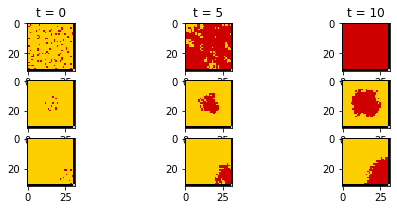

In [5]:
evolution1 = models("sis",0.2,0.3,initialLocation(30,30,0.1,"random"),Moore)
evolution2 = models("sis",0.2,0.3,initialLocation(30,30,0.1,"center"),Moore)
evolution3 = models("sis",0.2,0.3,initialLocation(30,30,0.1,"southeast"),Moore)

plt.subplot(3,3,1)
plt.title("t = 0")
evolution1.evolutionsPlot(30,0)

plt.subplot(3,3,2)
plt.title("t = 5")
evolution1.evolutionsPlot(30,5)

plt.subplot(3,3,3)
plt.title("t = 10")
evolution1.evolutionsPlot(30,10)

plt.subplot(3,3,4)
evolution2.evolutionsPlot(30,0)

plt.subplot(3,3,5)
evolution2.evolutionsPlot(30,5)

plt.subplot(3,3,6)
evolution2.evolutionsPlot(30,10)

plt.subplot(3,3,7)
evolution3.evolutionsPlot(30,0)

plt.subplot(3,3,8)
evolution3.evolutionsPlot(30,5)

plt.subplot(3,3,9)
evolution3.evolutionsPlot(30,10)

plt.show()

![texto del enlace](https://docs.google.com/drawings/d/e/2PACX-1vSJ1-tBPX7piJe6Jl8-nMrAJCebVx21NxoN8uWnIucbVODVHpH4sctN9FjrbwThRtLVtlgvVMkcVx1g/pub?w=717&h=700)

En la figura anterior podemos observar claramente que de acuerdo a la condición inicial de ubicación de infectados, el comportamiento de la enfermedad puede cambiar, esto en el sentido de la velocidad de convergencia de las soluciones. A continuación podemos visualizar la manera en la que la ubicación inicial de la población inicial (con respecto a los puntos cardinales) afecta la velocidad de convergencia para ambos estados:

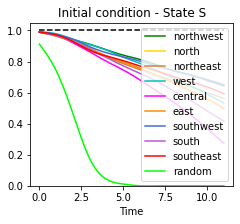

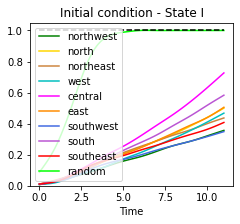

In [6]:
SIS1 = models("sis",0.2,0.5,initialLocation(30,30,0.1,"northwest"),Moore).basicModel(10)[0]
SIS2 = models("sis",0.2,0.5,initialLocation(30,30,0.1,"north"),Moore).basicModel(10)[0]
SIS3 = models("sis",0.2,0.5,initialLocation(30,30,0.1,"northeast"),Moore).basicModel(10)[0]
SIS4 = models("sis",0.2,0.5,initialLocation(30,30,0.1,"west"),Moore).basicModel(10)[0]
SIS5 = models("sis",0.2,0.5,initialLocation(30,30,0.1,"center"),Moore).basicModel(10)[0]
SIS6 = models("sis",0.2,0.5,initialLocation(30,30,0.1,"east"),Moore).basicModel(10)[0]
SIS7 = models("sis",0.2,0.5,initialLocation(30,30,0.1,"southwest"),Moore).basicModel(10)[0]
SIS8 = models("sis",0.2,0.5,initialLocation(30,30,0.1,"south"),Moore).basicModel(10)[0]
SIS9 = models("sis",0.2,0.5,initialLocation(30,30,0.1,"southeast"),Moore).basicModel(10)[0]
SIS10 = models("sis",0.2,0.5,initialLocation(30,30,0.1,"random"),Moore).basicModel(10)[0]

var_s = [SIS1[0], SIS2[0], SIS3[0], SIS4[0], SIS5[0], SIS6[0], SIS7[0],SIS8[0], SIS9[0], SIS10[0]]
var_i = [SIS1[1], SIS2[1], SIS3[1], SIS4[1], SIS5[1], SIS6[1], SIS7[1],SIS8[1], SIS9[1], SIS10[1]]
col_dis = ["g","gold","peru","c","magenta","darkorange","royalblue","mediumorchid","r","lime"]
eti_dis = ["northwest", "north", "northeast", "west", "central", "east", "southwest", "south", "southeast", "random"]

plt.subplot(1,2,1)
graficas(var_s, eti_dis, col_dis,"Initial condition - State S")

plt.subplot(1,2,2)
graficas(var_i, eti_dis, col_dis,"Initial condition - State I")

plt.show()

![texto del enlace](https://docs.google.com/drawings/d/e/2PACX-1vTasFeDMLg49KgWFqpmLGRIJwtClpbXDHTVTEg15H6HyA6eDRFXKXtH9tw93zf-K4udHDNyg6kGWwvj/pub?w=709&h=275)

La cualidad de ubicar de una manera diferente a los individuos infectados no es posible en el modelo clásico, resultando en una limitación de dicho modelo para el análisis de fenómenos epidemiológicos del tipo $SIS$.

Por otro lado, por la manera en la que se describió la regla base de evolución, podemos observar un cambio importante en el indicador $R_0$. En el modelo clásico este indicador depende únicamente de las tasas de infección y recuperación, mientras que en la implementación en AC, vemos que claramente este depende no solo de las tasas de infección y recuperación, sino que incluye una alteración en la probabilidad de infectarse (o de mantenerse infectado) de acuerdo con el comportamiento de sus células vecinas.

Es importante mencionar que las soluciones generadas por el modelo clásico y la implementación en AC no siempre convergen al mismo valor, esto se debe a la alteración en la evolución del agente generada por el comportamiento de su vecindad. 

Consideremos por ejemplo, una enfermedad en la que su tasa de infección sea $\beta=0.5$ y su tasa de recuperación este dada por $\alpha=0.2$, en el modelo clásico tenemos un indicador $R_0=2.5>1$ lo cual implica que la enfermedad podría llegar ser endémica [5]. Esta conclusión no se ve afectada en la implementación en autómatas celulares, sin embargo, podemos encontrar una diferencia en los valores a los cuales convergen las soluciones:

![texto del enlace](https://docs.google.com/drawings/d/e/2PACX-1vRGN8BjfWWAXRlWp16j-de_bOM_MeR-qsp4KVkkOfn0836wrnBmujYow1So8paD01AbClC-oWQ-d6fy/pub?w=714&h=500)

Una cualidad que resulta bastante interesante en la implementación en autómatas celulares es la posibilidad de definir zonas de riesgo a partir de mapas de calor del sistema hasta un periodo de tiempo arbitrario; este atributo no se encuentra en el modelo clásico debido a que no se define de manera concreta la estructura del sistema.

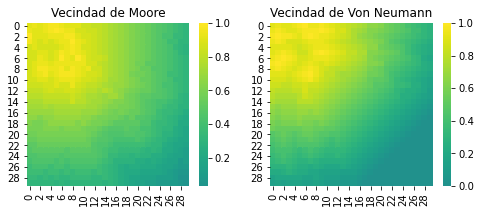

In [7]:
SIS_info_system_hm_M = models("sis",0.2,0.5,initialLocation(30,30,0.1,"northwest"),Moore).basicModel(30)[2]
SIS_info_system_hm_VN = models("sis",0.2,0.5,initialLocation(30,30,0.1,"northwest"),Von_Neumann).basicModel(30)[2]

#---Mapas de calor de la enfermedad en 30 tics----

plt.subplot(1,2,1)
plt.title("Vecindad de Moore") 
heatmap(SIS_info_system_hm_M,1)

plt.subplot(1,2,2)
plt.title("Vecindad de Von Neumann")
heatmap(SIS_info_system_hm_VN,1)

![texto del enlace](https://docs.google.com/drawings/d/e/2PACX-1vR5kOPAjexc79AAPx-ESYHST9NjXwQzzoHkMF-TUori4GMJjaQ9uOwzR8JM2GpB2YhSOLO0bohjJSoa/pub?w=674&h=259)

En la figura anterior, podemos identificar las zonas de alto riesgo por el color amarillo, estas zonas representan los espacios en los cuales los individuos estuvieron infectados por un mayor tiempo, mientras que por otro lado tenemos las zonas verdes o zonas de bajo riesgo, en estas ubicaciones la enfermedad pudo no haber estado presente por mucho tiempo o simplemente pudo no haberlas alcanzado.

## Modelo $SIR$ en autómatas celulares y una comparación con el modelo clásico

### Comparación entre el modelo $SIR$ clásico y la implementación en autómatas celulares

De acuerdo con lo descrito en [1], se consideraron dos posibles casos en los cuales el indicador $R_0$ actúa de manera diferente.

*   **La enfermedad C:** Posee una tasa de infección $\beta$ del $5\%$ y una tasa de recuperación $\alpha=0.2$, esto implica que en promedio la enfermedad dura una media de 5 días ($\alpha=1/5=0.2$), esto si tomamos las tasas por días.
*   **La enfermedad D:** Al igual que la enfermedad C, la enfermedad D posee una tasa de recuperación $\alpha=0.2$, pero su tasa de infección es del $50\%$.

Observe que en el caso de la enfermedad C, de acuerdo con [1] esta cuenta con un indicador $R_0=0.25< 1$, mientras que la enfermedad D cuenta con un indicador $R_0$ de 2.5. Se analizó el comportamiento de ambas enfermedades en un periodo de 100 días tanto en el modelo clásico como en la implementación en autómatas celulares:

*   **Evolución de la enfermedad C:** En ambos modelos se consideró una población inicial de individuos infectados y en el caso de la implementación en autómatas celulares, se considero una ubicación aleatoria inicial de los individuos infectados, obteniendo como resultado:

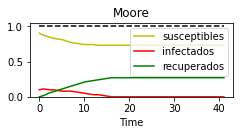

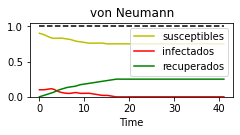

In [8]:
a=0.2; b=0.05  #alpha y beta

# plt.subplot(2,2,1)
# plt.title("EDO's model")
# grafsir(ND,TS,INPUT)

sm = models("sir",a,b,initialCondition(0.1,np.zeros((10,10))),Moore)
svn = models("sir",a,b,initialCondition(0.1,np.zeros((10,10))),Von_Neumann)

plt.subplot(2,2,2)
sm.metricsPlot(40,title="Moore")

plt.subplot(2,2,3)
svn.metricsPlot(40,title="von Neumann")

![texto del enlace](https://docs.google.com/drawings/d/e/2PACX-1vSyPNhakKc0-9tIEtdIgnFXszS9Nx_JZAI_yUypiJHVeJ505DrQemgrfpnsxjB_aTd7QQ3XtxsW-xhL/pub?w=703&h=511)

*   **Evolución de la enfermedad D:** Al igual que en el caso anterior, se considero una población inicial de individuos infectados del $10\%$ y en la implementación en AC una distribución inicial de infectados del tipo aleatoria.

![texto del enlace](https://docs.google.com/drawings/d/e/2PACX-1vQDhpO2ey-z04B869HAR1WRNCjaaL_6cVq5CJdF_BSw4mhns_utIdZI2TH1IjfssSgZFe7ewdNyQ4fV/pub?w=716&h=518)

Podemos preguntarnos si la manera en la que ubicamos inicialmente a los individuos infectados afecta o no el comportamiento de las soluciones de la implementación en autómatas celulares. Para responder a esto consideremos tres casos puntuales de condición inicial de ubicación para individuos infectados:

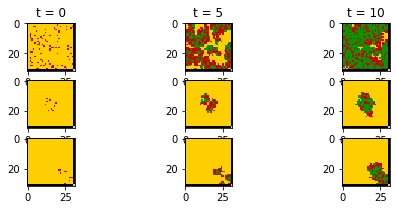

In [9]:
evolution1 = models("sir",0.2,0.3,initialLocation(30,30,0.1,"random"),Moore)
evolution2 = models("sir",0.2,0.3,initialLocation(30,30,0.1,"center"),Moore)
evolution3 = models("sir",0.2,0.3,initialLocation(30,30,0.1,"southeast"),Moore)

plt.subplot(3,3,1)
plt.title("t = 0")
evolution1.evolutionsPlot(30,0)

plt.subplot(3,3,2)
plt.title("t = 5")
evolution1.evolutionsPlot(30,5)

plt.subplot(3,3,3)
plt.title("t = 10")
evolution1.evolutionsPlot(30,10)

plt.subplot(3,3,4)
evolution2.evolutionsPlot(30,0)

plt.subplot(3,3,5)
evolution2.evolutionsPlot(30,5)

plt.subplot(3,3,6)
evolution2.evolutionsPlot(30,10)

plt.subplot(3,3,7)
evolution3.evolutionsPlot(30,0)

plt.subplot(3,3,8)
evolution3.evolutionsPlot(30,5)

plt.subplot(3,3,9)
evolution3.evolutionsPlot(30,10)

plt.show()

![texto del enlace](https://docs.google.com/drawings/d/e/2PACX-1vRqXw2azoPK2kDWGkMFSns6Yuia70F3SCXbYT9RbJ-2U1YvaAu_BaV2xcZhXsA3OPi7ZfY9C3x0d86b/pub?w=720&h=714)

De manera que si observamos el comportamiento de una manera mas precisa, se puede apreciar si bien no una diferencia en el comportamiento general de la enfermedad, si en la velocidad con la cual convergen las soluciones de la implementación:

![texto del enlace](https://docs.google.com/drawings/d/e/2PACX-1vRq1-Di3tXrbXGbPLpwjLvBW6xrpeNkUli0ixLod_MYZFMG0s5Pl7dZeWD4k-8BkdVKqN7FKkZDPYw8/pub?w=992&h=521)

De la misma manera en la que abordamos el análisis de la evolución de la enfermedad con respecto a la condición inicial de población infectada en el modelo $SIS$, si tomamos como punto de partida los puntos cardinales para realizar dicha ubicación podemos observar un comportamiento como el que se describe en la siguiente figura:

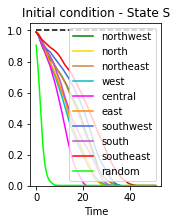

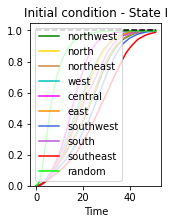

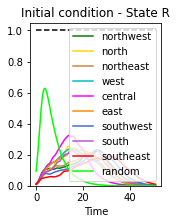

In [10]:
SIR1_M = models("sir",0.2,0.5,initialLocation(30,30,0.1,"northwest"),Moore).basicModel(50)[0]
SIR2_M = models("sir",0.2,0.5,initialLocation(30,30,0.1,"north"),Moore).basicModel(50)[0]
SIR3_M = models("sir",0.2,0.5,initialLocation(30,30,0.1,"northeast"),Moore).basicModel(50)[0]
SIR4_M = models("sir",0.2,0.5,initialLocation(30,30,0.1,"west"),Moore).basicModel(50)[0]
SIR5_M = models("sir",0.2,0.5,initialLocation(30,30,0.1,"center"),Moore).basicModel(50)[0]
SIR6_M = models("sir",0.2,0.5,initialLocation(30,30,0.1,"east"),Moore).basicModel(50)[0]
SIR7_M = models("sir",0.2,0.5,initialLocation(30,30,0.1,"southwest"),Moore).basicModel(50)[0]
SIR8_M = models("sir",0.2,0.5,initialLocation(30,30,0.1,"south"),Moore).basicModel(50)[0]
SIR9_M = models("sir",0.2,0.5,initialLocation(30,30,0.1,"southeast"),Moore).basicModel(50)[0]
SIR10_M = models("sir",0.2,0.5,initialLocation(30,30,0.1,"random"),Moore).basicModel(50)[0]

var_sm = [SIR1_M[0], SIR2_M[0], SIR3_M[0], SIR4_M[0], SIR5_M[0], SIR6_M[0], SIR7_M[0], SIR8_M[0], SIR9_M[0], SIR10_M[0]]
var_rm = [SIR1_M[1], SIR2_M[1], SIR3_M[1], SIR4_M[1], SIR5_M[1], SIR6_M[1], SIR7_M[1], SIR8_M[1], SIR9_M[1], SIR10_M[1]]
var_im = [SIR1_M[2], SIR2_M[2], SIR3_M[2], SIR4_M[2], SIR5_M[2], SIR6_M[2], SIR7_M[2], SIR8_M[2], SIR9_M[2], SIR10_M[2]]

col_dis = ["g", "gold", "peru", "c", "magenta", "darkorange", "royalblue", "mediumorchid", "r", "lime"]
eti_dis = ["northwest", "north", "northeast", "west", "central", "east", "southwest", "south", "southeast", "random"]

plt.subplot(1,3,1)
graficas(var_sm, eti_dis, col_dis,"Initial condition - State S")

plt.subplot(1,3,2)
graficas(var_im, eti_dis, col_dis,"Initial condition - State I")

plt.subplot(1,3,3)
graficas(var_rm, eti_dis, col_dis,"Initial condition - State R")

![texto del enlace](https://docs.google.com/drawings/d/e/2PACX-1vQi3il_K9DFSqP12T3iWjUyiaMJ9_t_NYc1aGF0YomK2v4YdONj6T2mMBiQuiMc2PS1w1lNOHLbtJYX/pub?w=1024&h=279)

La posibilidad de modelar diferentes condiciones iniciales de ubicación para individuos infectados es una cualidad presente únicamente en la implementación del modelo $SIR$ en AC. Por otro lado, al igual que en el caso del modelo $SIS$, la implementación nos permite definir zonas de riesgo basándonos en el comportamiento de las poblaciones hasta un determinado tiempo. 

Del lado izquierdo de la siguiente figura podemos observar el comportamiento de la población infectada en un periodo de 30 días, este mapa de calor nos permite visualizar que el tiempo promedio de infección corresponde con el descrito por los parámetros que definen a la enfermedad y por otro lado, tenemos el mapa de calor de la población recuperada, este mapa nos permite visualizar las zonas que se recuperaron primero y que por tanto, fueron las primeras en ser alcanzadas por la enfermedad.

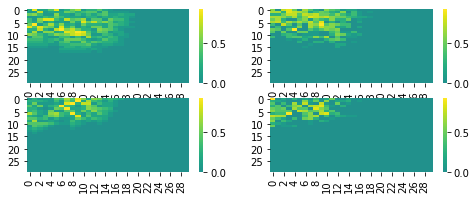

In [11]:
evolutionsOfSystem1 = models("sir",0.2,0.5,initialLocation(30,30,0.1,position = "northwest"),Moore).basicModel(10)[2]
evolutionsOfSystem2 = models("sir",0.2,0.5,initialLocation(30,30,0.1,position = "northwest"),Von_Neumann).basicModel(10)[2]

plt.subplot(2,2,1)
heatmap(evolutionsOfSystem1,1)

plt.subplot(2,2,2)
heatmap(evolutionsOfSystem1,2)

plt.subplot(2,2,3)
heatmap(evolutionsOfSystem2,1)

plt.subplot(2,2,4)
heatmap(evolutionsOfSystem2,2)

plt.show()

![texto del enlace](https://docs.google.com/drawings/d/e/2PACX-1vQZNfVumD3AN5ODCNx9VmGNP6M1tfImRQiEoHgvfXpeUc1Nz21Qo7rAOLI4kFO9hRlJ_BPo1cjUV5y8/pub?w=663&h=486)

## Variación en la condición de frontera del sistema y sus implicaciones en el estudio epidemiológico

Hasta este momento hemos analizado únicamente sistemas rectangulares, en esta sección estudiaremos las implicaciones que tiene cambiar la frontera de nuestro sistema en la evolución de la enfermedad.

### Variaciones en la condición de frontera del sistema

Al igual que en las implementaciones anteriores, se consideró una vecindad de Moore la cual considera una vecindad de 8 individuos; sin embargo esto no siempre es así. 

En los sistemas rectangulares por ejemplo, los individuos que se encuentran en los bordes del sistema solo cuentan con 5 vecinos y para el caso de los que están ubicados en las esquinas de dichos sistemas, sus vecindades cuentan con tan solo 3 individuos.

Debido a que dos de las reglas que hemos implementado hasta ahora cuentan con una dependencia implícita del comportamiento de la vecindad, debemos realizar un ajuste en cuanto a la cantidad de vecinos con los que cuenta el agente en cuestión.

**Definición 5.1.** Definimos la regla base de interacción local generalizada como:
\begin{equation}
    \phi_{ij}^t(\alpha,\beta)=\left\{
    \begin{array}{cl}
    x_{ij}^{t+1}\in S & \textrm{si }\rho\leq\frac{\beta}{\alpha}\cdot\frac{N_{ij}^t(I)}{8-N_{ij}^t(V)}\textrm{, con }N_{ij}^t(V)\neq8\\
    x_{ij}^{t+1}\in I & \textrm{en otro caso}
    \end{array}
    \right.
\end{equation}
Donde $N_{ij}^t(V)$ representa a la cantidad de espacios vacíos o ausentes (identificados con el color negro) en la vecindad de Moore del agente en la posición $ij$. De manera análoga se define la regla de interacción $SI$ generalizada.

A continuación mostramos una serie de ejemplos que verifican el correcto funcionamiento de la definición 5.1, en cada uno se consideró tanto para el caso del modelo $SIS$ como el caso del modelo $SIR$, una enfermedad con parámetros $\alpha=0.2$ y $\beta=0.5$ en un periodo de 100 días, una ubicación inicial de individuos infectados del tipo aleatorio y una población infectada inicial del $10\%$ con respecto al tamaño de cada sistema, con lo cual obtuvimos los siguientes resultados promedio para 100 simulaciones:

*  **Modelos epidemiológicos sobre una linea:** Se considero un sistema lineal con 10 individuos.
    
En la siguiente figura podemos observar un cambio importante con respecto a la trayectoria de las soluciones, estos cambios se deben a la naturaleza de las vecindades en un sistema de este tipo.

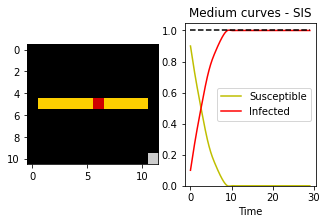

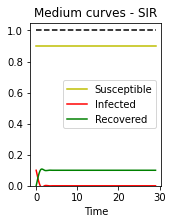

In [12]:
L=-np.ones((9,10))
# L=initialCondition(0.1,rectangularBoundary(1,10,4,0,L))
L = rectangularBoundary(1,10,4,0,L)

msl = models("sis",0.2,0.5,L,Moore).mediumCurves(0.1,30,10)[0]
var_sis = [msl[0],msl[1]]; eti_sis = ["Susceptible", "Infected"]; col_sis = ["y", "r"] 
msil = models("sir",0.2,0.5,L,Moore).mediumCurves(0.1,30,10)[0]
var_sir = [msil[0],msil[1],msil[2]]; eti_sir = ["Susceptible","Infected","Recovered"]; col_sir = ["y","r","g"] 

plt.subplot(1,3,1)
plt.imshow(color(initialCondition(0.1,L)),cmap="nipy_spectral", interpolation='nearest')

plt.subplot(1,3,2)
graficas(var_sis,eti_sis,col_sis,"Medium curves - SIS")

plt.subplot(1,3,3)
graficas(var_sir,eti_sir,col_sir,"Medium curves - SIR")

plt.show()

![texto del enlace](https://docs.google.com/drawings/d/e/2PACX-1vTNxzf2g1J38UicYaTHifeU_4Z2xyzWEmUAkYo0P25xOUCpt9oRr2lT4t4kTwOrbSKG45fg392PdK9U/pub?w=947&h=277)

*   **Modelos epidemiológicos sobre un cuadrado:** Se consideró un sistema de $10\times10$.

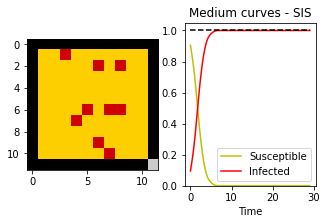

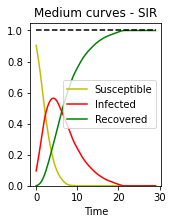

In [16]:
C=np.zeros((10,10))

msl = models("sis",0.2,0.5,C,Moore).mediumCurves(0.1,30,10)[0]
var_sis = [msl[0],msl[1]]; eti_sis = ["Susceptible", "Infected"]; col_sis = ["y", "r"] 
msil = models("sir",0.2,0.5,C,Moore).mediumCurves(0.1,30,10)[0]
var_sir = [msil[0],msil[1],msil[2]]; eti_sir = ["Susceptible","Infected","Recovered"]; col_sir = ["y","r","g"] 

plt.subplot(1,3,1)
plt.imshow(color(initialCondition(0.1,C)),cmap="nipy_spectral", interpolation='nearest')

plt.subplot(1,3,2)
graficas(var_sis,eti_sis,col_sis,"Medium curves - SIS")

plt.subplot(1,3,3)
graficas(var_sir,eti_sir,col_sir,"Medium curves - SIR")

plt.show()

![texto del enlace](https://docs.google.com/drawings/d/e/2PACX-1vR29BHWiDU_IA1Cuwd55ciri-2bJ9VmFuEMLNaBA8SfUr6Jqcc19N-vGKrHG1St_kf2yJ9UKoSKMRXJ/pub?w=917&h=272)

*   **Modelos epidemiológicos sobre una región rectangular:** En este caso se tomo un sistema $5\times10$.

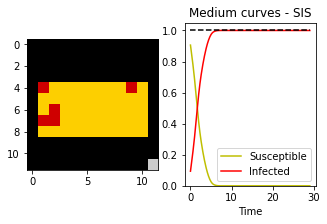

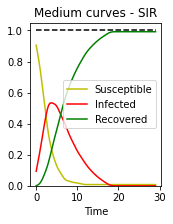

In [17]:
R1=rectangularBoundary(5,10,3,0,-np.ones((10,10)))

msl = models("sis",0.2,0.5,R1,Moore).mediumCurves(0.1,30,10)[0]
var_sis = [msl[0],msl[1]]; eti_sis = ["Susceptible", "Infected"]; col_sis = ["y", "r"] 
msil = models("sir",0.2,0.5,R1,Moore).mediumCurves(0.1,30,10)[0]
var_sir = [msil[0],msil[1],msil[2]]; eti_sir = ["Susceptible","Infected","Recovered"]; col_sir = ["y","r","g"] 

plt.subplot(1,3,1)
plt.imshow(color(initialCondition(0.1,R1)),cmap="nipy_spectral", interpolation='nearest')

plt.subplot(1,3,2)
graficas(var_sis,eti_sis,col_sis,"Medium curves - SIS")

plt.subplot(1,3,3)
graficas(var_sir,eti_sir,col_sir,"Medium curves - SIR")
 
plt.show()

![texto del enlace](https://docs.google.com/drawings/d/e/2PACX-1vRqrBothaRE6SPgLoqBQkaUn6jb6IcGB3aT61rBL6RLX6_7lPpLw6j1-kFoHAm624fucqfZiHfw3a0G/pub?w=925&h=267)

*   **Modelos epidemiológicos sobre una región tipo rombo:** Para nuestro cuarto ejemplo tomamos una población de 46 individuos en un sistema tipo rombo.

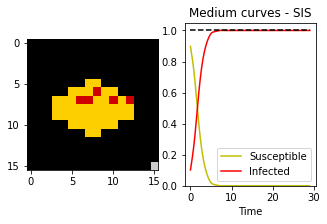

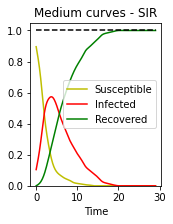

In [18]:
def rombo(a,b,c,d,M):           
    L=[M]
    i=0
    while c>1:
        a=a+2; b=b-4; c=c-1; d=d+2; i=i+1
        L.append(rectangularBoundary(a,b,c,d,L[i-1]))
    return L[i]

R2=-np.ones((14,14))
R2=rombo(1,14,7,0,R2)

eti_sis = ["Susceptible", "Infected"]; col_sis = ["y", "r"]

msr2=models("sis",0.2,0.5,R2,Moore).mediumCurves(0.1,30,10)[0]
var_sis = [msr2[0],msr2[1]]
msir2=models("sir",0.2,0.5,R2,Moore).mediumCurves(0.1,30,10)[0]
var_sir = [msir2[0],msir2[1],msir2[2]]

plt.subplot(1,3,1)
plt.imshow(color(initialCondition(0.1,R2)),cmap="nipy_spectral", interpolation='nearest')

plt.subplot(1,3,2)
graficas(var_sis,eti_sis,col_sis,"Medium curves - SIS")

plt.subplot(1,3,3)
graficas(var_sir,eti_sir,col_sir,"Medium curves - SIR")

plt.show()

![texto del enlace](https://docs.google.com/drawings/d/e/2PACX-1vT6n-zhmAd5h68v0M2IcutPJZgVyWkmxkDQh6YxieAImLHR7XLVFwnTMPThyvpSKp2JI7i19yDc2j6e/pub?w=921&h=269)

*   **Modelos epidemiológicos en una región triangular:** Se consideró una región triangular con un total de 56 individuos.

NameError: name 'eti_sis' is not defined

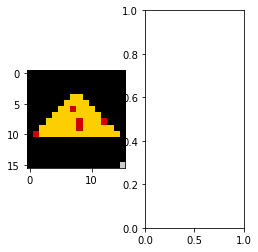

In [3]:
def triangulo(n,m,a,b,M):
    L=[M]
    i=0
    while m>=1:
        i=i+1
        L.append(rectangularBoundary(n,m,a,b,L[i-1]))
        m=m-2; a=a-1; b=b+1
    return L[i]

T=-np.ones((14,14))
T=triangulo(1,14,9,0,T)

mst=models("sis",0.2,0.5,T,Moore).mediumCurves(0.1,30,10)[0]
var_sis = [mst[0],mst[1]]
msit=models("sir",0.2,0.5,T,Moore).mediumCurves(0.1,30,10)[0]
var_sir = [msit[0],msit[1],msit[2]]

plt.subplot(1,3,1)
plt.imshow(color(initialCondition(0.1,T)),cmap="nipy_spectral", interpolation='nearest')

plt.subplot(1,3,2)
graficas(var_sis,eti_sis,col_sis,"Medium curves - SIS")

plt.subplot(1,3,3)
graficas(var_sir,eti_sir,col_sir,"Medium curves - SIR")

plt.show()

![texto del enlace](https://docs.google.com/drawings/d/e/2PACX-1vSMRIiByLXHesrvzziMB9b7m9B9HLPs43eherv2IjGUbcI3BqwhVv0BR51_SsgXtQFbAOKFAgu1yrda/pub?w=925&h=275)

*   **Modelos epidemiológicos en una región tipo anillo: (caso $\#1$)** Se tomo una población de 48 individuos. Observe que en el caso del modelo $SIR$, la población susceptible no converge a cero como en los ejemplos anteriores, esto se debe a la dificultada que puede tener la propagación de la enfermedad por la manera en la que se definió el sistema.

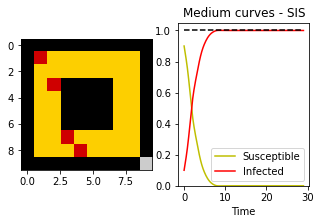

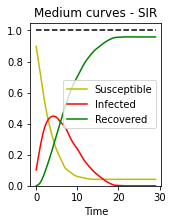

In [20]:
C1 = -np.ones((8,8))
C1 = rectangularBoundary(2,8,0,0,C1)
C1 = rectangularBoundary(8,2,0,0,C1)
C1 = rectangularBoundary(8,2,0,6,C1)
C1 = rectangularBoundary(2,8,6,0,C1)

msc1=models("sis",0.2,0.5,C1,Moore).mediumCurves(0.1,30,10)[0]
var_sis = [msc1[0],msc1[1]]
msic1=models("sir",0.2,0.5,C1,Moore).mediumCurves(0.1,30,10)[0]
var_sir = [msic1[0],msic1[1],msic1[2]]

plt.subplot(1,3,1)
plt.imshow(color(initialCondition(0.1,C1)),cmap="nipy_spectral", interpolation='nearest')

plt.subplot(1,3,2)
graficas(var_sis,eti_sis,col_sis,"Medium curves - SIS")

plt.subplot(1,3,3)
graficas(var_sir,eti_sir,col_sir,"Medium curves - SIR")

plt.show()

![texto del enlace](https://docs.google.com/drawings/d/e/2PACX-1vRmtUe2gGaZcje6vOiiVJNNVm6a6L54g4BPhkjC0ci4AKBdxiLuenlX-qSiGcjFADpo6YuLQ-ebIJdl/pub?w=917&h=277)

*   **Modelos epidemiológicos en un sistema con población alejada: (caso $\#2$)** Supongamos que tenemos un sistema en el cual cierto grupo de la población no tiene contacto con el resto de los individuos (figura a), este sistema cuenta con una población de 52 individuos. Observe que en ambos modelos, la curva que describe el comportamiento no tiende a cero como en los casos anteriores; esto implica que la enfermedad no alcanza a todos los individuos del sistema, esto debido al distanciamiento con el que cuentan los individuos en el bloque central del sistema.

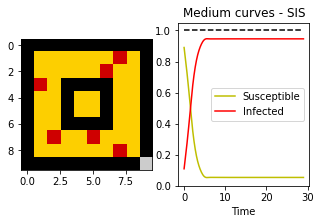

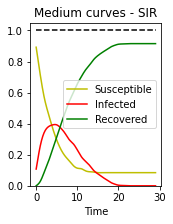

In [21]:
C2=rectangularBoundary(2,2,3,3,C1)

msc2=models("sis",0.2,0.5,C2,Moore).mediumCurves(0.1,30,10)[0]
var_sis = [msc2[0],msc2[1]]
msic2=models("sir",0.2,0.5,C2,Moore).mediumCurves(0.1,30,10)[0]
var_sir = [msic2[0],msic2[1],msic2[2]]

plt.subplot(1,3,1)
plt.imshow(color(initialCondition(0.1,C2)),cmap="nipy_spectral", interpolation='nearest')

plt.subplot(1,3,2)
graficas(var_sis,eti_sis,col_sis,"Medium curves - SIS")

plt.subplot(1,3,3)
graficas(var_sir,eti_sir,col_sir,"Medium curves - SIR")

plt.show()

![texto del enlace](https://docs.google.com/drawings/d/e/2PACX-1vShSEQEY0kbA6pMwGIZScan3FnycAUl46vN1q0SgRD8JgZTAKPU7TBzTvhUfU2z1zMuD_hwmCKTFSkp/pub?w=917&h=275)

*Observación:* A diferencia del caso lineal, podemos observar una similitud en cuando al comportamiento de la población infectada en el tiempo. Esto nos sugiere que la manera en la que definimos la condición de frontera del sistema, afecta no solo la velocidad de convergencia sino los valores a los cuales convergen las curvas que describen el comportamiento de las poblaciones en el tiempo.

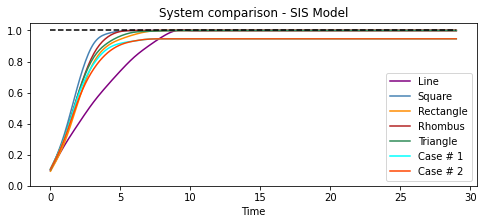

In [22]:
SISL  = models("sis",0.2,0.5,L,Moore).mediumCurves(0.1,30,10)[0]
SISC  = models("sis",0.2,0.5,C,Moore).mediumCurves(0.1,30,10)[0]
SISR1 = models("sis",0.2,0.5,R1,Moore).mediumCurves(0.1,30,10)[0]
SISR2 = models("sis",0.2,0.5,R2,Moore).mediumCurves(0.1,30,10)[0]
SIST  = models("sis",0.2,0.5,T,Moore).mediumCurves(0.1,30,10)[0]
SISC1 = models("sis",0.2,0.5,C1,Moore).mediumCurves(0.1,30,10)[0]
SISC2 = models("sis",0.2,0.5,C2,Moore).mediumCurves(0.1,30,10)[0]

var_sis = [SISL[1], SISC[1], SISR1[1], SISR2[1], SIST[1], SISC1[1], SISC2[1]]
col = ["purple", "steelblue", "darkorange", "firebrick", "seagreen", "cyan", "orangered"]
eti = ["Line", "Square", "Rectangle", "Rhombus", "Triangle", "Case # 1", "Case # 2"]
graficas(var_sis,eti,col,"System comparison - SIS Model")

![texto del enlace](https://docs.google.com/drawings/d/e/2PACX-1vS2fIUw7wYiZVyMW-ubCbKgVRSqzX3OOHgNnvjZHWZXUkV_S8lcf5mxNTL3bGeDN-ySlq6u3jGuBgaV/pub?w=376&h=272)

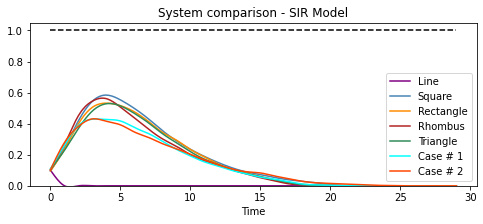

In [23]:
SIRL  = models("sir",0.2,0.5,L,Moore).mediumCurves(0.1,30,10)[0]
SIRC  = models("sir",0.2,0.5,C,Moore).mediumCurves(0.1,30,10)[0]
SIRR1 = models("sir",0.2,0.5,R1,Moore).mediumCurves(0.1,30,10)[0]
SIRR2 = models("sir",0.2,0.5,R2,Moore).mediumCurves(0.1,30,10)[0]
SIRT  = models("sir",0.2,0.5,T,Moore).mediumCurves(0.1,30,10)[0]
SIRC1 = models("sir",0.2,0.5,C1,Moore).mediumCurves(0.1,30,10)[0]
SIRC2 = models("sir",0.2,0.5,C2,Moore).mediumCurves(0.1,30,10)[0]

var_sir=[SIRL[1], SIRC[1], SIRR1[1], SIRR2[1], SIRT[1], SIRC1[1],SIRC2[1]]
graficas(var_sir,eti,col,"System comparison - SIR Model")

![texto del enlace](https://docs.google.com/drawings/d/e/2PACX-1vTP_rfV4s41DIpbJhyM0SkdSsLQT8OeNqo8JD9gGJXYT7nhL-wtMfAo5TkRbgl2VPc8rtNNsrSL93Q3/pub?w=386&h=279)

### Variaciones en la escala del sistema

Es importante preguntarnos si cambiar la escala de un sistema altera de alguna manera la evolución del sistema. Al igual que en el análisis en la variación de condiciones de frontera, consideraremos una serie de ejemplos para visualizar si existe o no, una variación en la evolución de la enfermedad.

En cada uno de los siguientes ejemplos se realizaron 4 cambios de escala sobre el tipo de sistema en cuestión, posteriormente se aplicaron las implementaciones de los modelos $SIS$ y $SIR$ tomando como punto de partida una enfermedad con parámetros $\alpha=0.2$ y $\beta=0.5$, una población infectada inicial del $10\%$ con una ubicación inicial del tipo aleatoria.

*   **Cambios de escala sobre la linea:** Se considero un sistema inicial de 100 individuos y se realizaron 4 cambios de escala de modo que las cantidades de individuos fueran 200, 300, 400 y 500 individuos por cada cambio respectivamente.

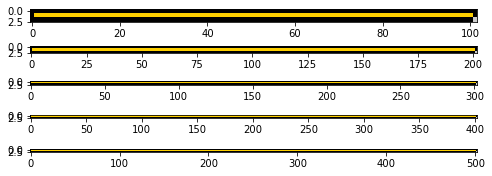

In [13]:
L1 = np.zeros((1,100))
L2 = np.zeros((1,200))
L3 = np.zeros((1,300))
L4 = np.zeros((1,400))
L5 = np.zeros((1,500))

plt.subplot(5,1,1)
plt.imshow(color(L1),cmap="nipy_spectral", interpolation='nearest')

plt.subplot(5,1,2)
plt.imshow(color(L2),cmap="nipy_spectral", interpolation='nearest')

plt.subplot(5,1,3)
plt.imshow(color(L3),cmap="nipy_spectral", interpolation='nearest')

plt.subplot(5,1,4)
plt.imshow(color(L4),cmap="nipy_spectral", interpolation='nearest')

plt.subplot(5,1,5)
plt.imshow(color(L5),cmap="nipy_spectral", interpolation='nearest')

plt.show()

![texto del enlace](https://docs.google.com/drawings/d/e/2PACX-1vSTTlQwQIW9HM9wq-4PoTQmV27tXGyhQwCa1oHi1NbHrmTWbU1aVHWmrR59KhgYjnLwPyXslePKs3Jv/pub?w=387&h=234)

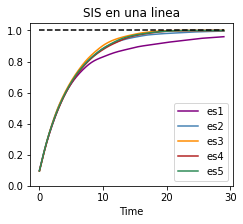

In [14]:
SISL1=models("sis",0.2,0.5,L1,Moore).mediumCurves(0.1,30,10)
# SIRL1=models("sir",0.2,0.5,L1,Moore).mediumCurves(0.1,30,10)[0]

SISL2=models("sis",0.2,0.5,L2,Moore).mediumCurves(0.1,30,10)
# SIRL2=models("sir",0.2,0.5,L2,Moore).mediumCurves(0.1,30,10)[0]

SISL3=models("sis",0.2,0.5,L3,Moore).mediumCurves(0.1,30,10)
# SIRL3=models("sir",0.2,0.5,L3,Moore).mediumCurves(0.1,30,10)[0]

SISL4=models("sis",0.2,0.5,L4,Moore).mediumCurves(0.1,30,10)
# SIRL4=models("sir",0.2,0.5,L4,Moore).mediumCurves(0.1,30,10)[0]

SISL5=models("sis",0.2,0.5,L5,Moore).mediumCurves(0.1,30,10)
# SIRL5=models("sir",0.2,0.5,L5,Moore).mediumCurves(0.1,30,10)[0]

var_sis=[SISL1[0][1],SISL2[0][1],SISL3[0][1],SISL4[0][1],SISL5[0][1]]
# var_sir=[SIRL1[1],SIRL2[1],SIRL3[1],SIRL4[1],SIRL5[1]]

col_esc = ["purple", "steelblue", "darkorange", "firebrick", "seagreen"]
eti_esc = ["es1", "es2", "es3", "es4", "es5"]
col_dif = ["purple", "steelblue", "darkorange", "firebrick"]
eti_dif = ["E5-E1", "E5-E2", "E5-E3", "E5-E4"]

plt.subplot(1,2,1)
graficas(var_sis,eti_esc,col_esc,"SIS en una linea")

# plt.subplot(1,2,2)
# graficas(var_sir,eti_esc,col_esc,"SIR en una linea")

plt.show()

![texto del enlace](https://docs.google.com/drawings/d/e/2PACX-1vTmMDbVdn0yeJDdB08RJgut2A80Tz4Ri5NPqo3g9SDEmEHShVn0gSyIoSmJdmu--cx0e9E9kEENH7tF/pub?w=723&h=282)

Si graficamos las diferencias presentes entre cada escala y la escala mayor (es este caso la escala de 500 individuos) obtenemos:

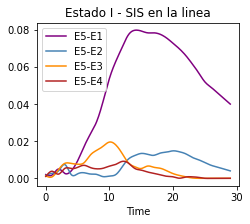

In [15]:
var_difs = [variationsBetweenScales(SISL1[1][0], SISL5[1][0]), variationsBetweenScales(SISL2[1][0], SISL5[1][0]), 
            variationsBetweenScales(SISL3[1][0], SISL5[1][0]), variationsBetweenScales(SISL4[1][0], SISL5[1][0])]
# var_difsi = [variationsBetweenScales(SIRL1[1][0], SIRL5[1][0]), variationsBetweenScales(SIRL2[1][0], SIRL5[1][0]), 
#              variationsBetweenScales(SIRL3[1][0], SIRL5[1][0]), variationsBetweenScales(SIRL4[1][0], SIRL5[1][0])]

plt.subplot(1,2,1)
graficas(var_difs,eti_dif,col_dif,"Estado I - SIS en la linea", limit=False)

# plt.subplot(1,2,2)
# graficas(var_difsi,eti_dif,col_dif,"Estado I - SIR en la linea", limit=False)

plt.show()

![texto del enlace](https://docs.google.com/drawings/d/e/2PACX-1vRtWEbWIS_U3M0EcZtTfLbwLwNlVzsB9hsYz7ah8-QOFkWwDochQp4ARNVoU9C1ESFivKREb2Xfj20x/pub?w=731&h=279)

*   **Cambios de escala sobre el cuadrado:** En este caso se tomo un sistema cuadrado inicial de 100 individuos, los 4 cambios de escala analizados representan poblaciones de 625, 2500, 5625 y 10000 individuos respectivamente.

In [28]:
# C1 = np.zeros((10, 10))
# C2 = np.zeros((25, 25))
# C3 = np.zeros((50, 50))
# C4 = np.zeros((75, 75))
# C5 = np.zeros((100, 100))

# plt.subplot(2,3,1)
# plt.imshow(color(C1),cmap="nipy_spectral", interpolation='nearest')

# plt.subplot(2,3,2)
# plt.imshow(color(C2),cmap="nipy_spectral", interpolation='nearest')

# plt.subplot(2,3,3)
# plt.imshow(color(C3),cmap="nipy_spectral", interpolation='nearest')

# plt.subplot(2,3,4)
# plt.imshow(color(C4),cmap="nipy_spectral", interpolation='nearest')

# plt.subplot(2,3,5)
# plt.imshow(color(C5),cmap="nipy_spectral", interpolation='nearest')

# plt.show()

![texto del enlace](https://docs.google.com/drawings/d/e/2PACX-1vRr1ToMA_UH1SsY1Y-re-aqMETUCtmjxHuH787FRmDJkZdGS1rxwGh1te_jPWYtRi-9bi_1F4RGPmNz/pub?w=687&h=490)

In [29]:
# SISC1=SIS_MediumCurves(0.2,0.5,10,10,0.1,C1,1,1,Moore)
# SIRC1=SIR_MediumCurves(0.2,0.5,10,10,0.1,C1,1,1,Moore)

# SISC2=SIS_MediumCurves(0.2,0.5,10,10,0.1,C2,1,1,Moore)
# SIRC2=SIR_MediumCurves(0.2,0.5,10,10,0.1,C2,1,1,Moore)

# SISC3=SIS_MediumCurves(0.2,0.5,10,10,0.1,C3,1,1,Moore)
# SIRC3=SIR_MediumCurves(0.2,0.5,10,10,0.1,C3,1,1,Moore)

# SISC4=SIS_MediumCurves(0.2,0.5,10,10,0.1,C4,1,1,Moore)
# SIRC4=SIR_MediumCurves(0.2,0.5,10,10,0.1,C4,1,1,Moore)

# SISC5=SIS_MediumCurves(0.2,0.5,10,10,0.1,C5,1,1,Moore)
# SIRC5=SIR_MediumCurves(0.2,0.5,10,10,0.1,C5,1,1,Moore)

# var_sis=[SISC1[1],SISC2[1],SISC3[1],SISC4[1],SISC5[1]]
# var_sir=[SIRC1[2],SIRC2[2],SIRC3[2],SIRC4[2],SIRC5[2]]

# plt.subplot(1,2,1)
# graficas(var_sis,eti_esc,col_esc,"SIS en un cuadrado")

# plt.subplot(1,2,2)
# graficas(var_sir,eti_esc,col_esc,"SIR en un cuadrado")

# plt.show()

![texto del enlace](https://docs.google.com/drawings/d/e/2PACX-1vSkSVWOjj9nZAxPGXZblPnjIN5m4mqbCHIkekoPNY9BaXOcW_cFJBfKZ3tuuuo6pKYtbZNRRdgNqemS/pub?w=713&h=278)

Al igual que en el ejemplo anterior, graficaremos las diferencias encontradas al realizar los cambios de escala tomando como escala de comparación a la que cuenta con 10000 individuos.

In [30]:
# plt.subplot(1,2,1)
# var_difs = [variationsBetweenScales(SISC1[3], SISC5[3]), variationsBetweenScales(SISC2[3], SISC5[3]), 
#             variationsBetweenScales(SISC3[3], SISC5[3]), variationsBetweenScales(SISC4[3], SISC5[3])]
# graficas(var_difs,eti_dif,col_dif,"Estado I - SIS en el cuadrado",limit=False)

# plt.subplot(1,2,2)
# var_difsi = [variationsBetweenScales(SIRC1[3], SIRC5[3]), variationsBetweenScales(SIRC2[3], SIRC5[3]), 
#              variationsBetweenScales(SIRC3[3], SIRC5[3]), variationsBetweenScales(SIRC4[3], SIRC5[3])]
# graficas(var_difsi,eti_dif,col_dif,"Estado I - SIR en el cuadrado", limit=False)

# plt.show()

![texto del enlace](https://docs.google.com/drawings/d/e/2PACX-1vSrBu-q1AEneAsaSI-olSD4HxcB0XnvznZPvV0sQZ6u6yBtLtmU0umJRHeBeVprsXtVyguldW3S_tEI/pub?w=720&h=274)

En los ejemplos posteriores se tomaron escalas de manera que el tamaño del sistema o su cantidad de individuos en cada escala, coincidiera con los planteados en el ejemplo de cambios de escala en el cuadrado.

*   **Cambios de escala sobre una región rectangular:** Para este ejercicio se consideraron cambios de escala de tal manera que sus tamaños coincidieran con las escalas tomadas en el caso del cuadrado, obteniendo así:

In [31]:
# Re1 = np.zeros((5,20))
# Re2 = np.zeros((13,52))
# Re3 = np.zeros((25,100))
# Re4 = np.zeros((38,152))
# Re5 = np.zeros((50,200))

# plt.subplot(2,3,1)
# plt.imshow(color(Re1),cmap="nipy_spectral", interpolation='nearest')

# plt.subplot(2,3,2)
# plt.imshow(color(Re2),cmap="nipy_spectral", interpolation='nearest')

# plt.subplot(2,3,3)
# plt.imshow(color(Re3),cmap="nipy_spectral", interpolation='nearest')

# plt.subplot(2,3,4)
# plt.imshow(color(Re4),cmap="nipy_spectral", interpolation='nearest')

# plt.subplot(2,3,5)
# plt.imshow(color(Re5),cmap="nipy_spectral", interpolation='nearest')

# plt.show()

![texto del enlace](https://docs.google.com/drawings/d/e/2PACX-1vS1PySpv-uiBthEcMvZNzutZuVlf1BYwxaaqAP-KgrCCxRjLQUza6-azgmYTGSuOdypDVu2-QZWT7nk/pub?w=1036&h=249)

In [32]:
# SISRe1=SIS_MediumCurves(0.2,0.5,10,10,0.1,Re1,1,1,Moore)
# SIRRe1=SIR_MediumCurves(0.2,0.5,10,10,0.1,Re1,1,1,Moore)

# SISRe2=SIS_MediumCurves(0.2,0.5,10,10,0.1,Re2,1,1,Moore)
# SIRRe2=SIR_MediumCurves(0.2,0.5,10,10,0.1,Re2,1,1,Moore)

# SISRe3=SIS_MediumCurves(0.2,0.5,10,10,0.1,Re3,1,1,Moore)
# SIRRe3=SIR_MediumCurves(0.2,0.5,10,10,0.1,Re3,1,1,Moore)

# SISRe4=SIS_MediumCurves(0.2,0.5,10,10,0.1,Re4,1,1,Moore)
# SIRRe4=SIR_MediumCurves(0.2,0.5,10,10,0.1,Re4,1,1,Moore)

# SISRe5=SIS_MediumCurves(0.2,0.5,10,10,0.1,Re5,1,1,Moore)
# SIRRe5=SIR_MediumCurves(0.2,0.5,10,10,0.1,Re5,1,1,Moore)

# plt.subplot(1,2,1)
# var_sis=[SISRe1[1],SISRe2[1],SISRe3[1],SISRe4[1],SISRe5[1]]
# graficas(var_sis,eti_esc,col_esc,"SIS en un rectangulo")

# plt.subplot(1,2,2)
# var_sir=[SIRRe1[2],SIRRe2[2],SIRRe3[2],SIRRe4[2],SIRRe5[2]]
# graficas(var_sir,eti_esc,col_esc,"SIR en un rectangulo")

# plt.show()

![texto del enlace](https://docs.google.com/drawings/d/e/2PACX-1vSYQ5MRbANTUx17utWHqbwqGPXkvYSPBuTGW2D_ZOy_Bfrrty7f5d4ds54hylWh4abW7ImKGqGoORXg/pub?w=710&h=268)

Si graficamos las diferencias entre escalas de manera análoga a como ocurría en los ejemplos anteriores obtenemos:

In [33]:
# plt.subplot(1,2,1)
# var_difs=[variationsBetweenScales(SISRe1[3],SISRe5[3]),variationsBetweenScales(SISRe2[3],SISRe5[3]),variationsBetweenScales(SISRe3[3],SISRe5[3]),scale_differences(SISRe4[3],SISRe5[3])]
# graficas(var_difs,eti_dif,col_dif,"Estado I - SIS en el rectangulo", limit=False)

# plt.subplot(1,2,2)
# var_difsi=[variationsBetweenScales(SIRRe1[3],SIRRe5[3]),variationsBetweenScales(SIRRe2[3],SIRRe5[3]),variationsBetweenScales(SIRRe3[3],SIRRe5[3]),scale_differences(SIRRe4[3],SIRRe5[3])]
# graficas(var_difsi,eti_dif,col_dif,"Estado I - SIR en el rectangulo")

# plt.show()

![texto del enlace](https://docs.google.com/drawings/d/e/2PACX-1vR5GV6ufxzhGE8m-KW0tzInzQ-IoQgcFk7tyy-k6Vj_bs830OzfzttAk-4x8xrMLoIltBp2L9IVfjGE/pub?w=724&h=265)

*   **Cambios de escala en una región tipo rombo:**

In [34]:
# Ro1=-np.ones((11,20));   Ro1=rombo(1,20,5,0,Ro1)
# Ro2=-np.ones((32,50));   Ro2=rombo(1,50,16,0,Ro2)
# Ro3=-np.ones((60,100));  Ro3=rombo(1,100,30,1,Ro3)
# Ro4=-np.ones((80,150));  Ro4=rombo(1,150,40,0,Ro4)
# Ro5=-np.ones((110,200)); Ro5=rombo(1,200,55,0,Ro5)

# plt.subplot(2,3,1)
# plt.imshow(color(Ro1),cmap="nipy_spectral", interpolation='nearest')

# plt.subplot(2,3,2)
# plt.imshow(color(Ro2),cmap="nipy_spectral", interpolation='nearest')

# plt.subplot(2,3,3)
# plt.imshow(color(Ro3),cmap="nipy_spectral", interpolation='nearest')

# plt.subplot(2,3,4)
# plt.imshow(color(Ro4),cmap="nipy_spectral", interpolation='nearest')

# plt.subplot(2,3,5)
# plt.imshow(color(Ro5),cmap="nipy_spectral", interpolation='nearest')

# plt.show()

![texto del enlace](https://docs.google.com/drawings/d/e/2PACX-1vRDvpQUScGAZf9d1enD_QJg9DDDVI9oUZalGktMcx5nRHb57XazfnAm_LnujUYF5sMvo9SBP_AwJHJz/pub?w=942&h=443)

In [35]:
# SISRo1=SIS_MediumCurves(0.2,0.5,10,10,0.1,Ro1,1,1,Moore)
# SIRRo1=SIR_MediumCurves(0.2,0.5,10,10,0.1,Ro1,1,1,Moore)

# SISRo2=SIS_MediumCurves(0.2,0.5,10,10,0.1,Ro2,1,1,Moore)
# SIRRo2=SIR_MediumCurves(0.2,0.5,10,10,0.1,Ro2,1,1,Moore)

# SISRo3=SIS_MediumCurves(0.2,0.5,10,10,0.1,Ro3,1,1,Moore)
# SIRRo3=SIR_MediumCurves(0.2,0.5,10,10,0.1,Ro3,1,1,Moore)

# SISRo4=SIS_MediumCurves(0.2,0.5,10,10,0.1,Ro4,1,1,Moore)
# SIRRo4=SIR_MediumCurves(0.2,0.5,10,10,0.1,Ro4,1,1,Moore)

# SISRo5=SIS_MediumCurves(0.2,0.5,10,10,0.1,Ro5,1,1,Moore)
# SIRRo5=SIR_MediumCurves(0.2,0.5,10,10,0.1,Ro5,1,1,Moore)

# plt.subplot(1,2,1)
# var_sis=[SISRo1[1],SISRo2[1],SISRo3[1],SISRo4[1],SISRo5[1]]
# graficas(var_sis,eti_esc,col_esc,"SIS en un rombo")

# plt.subplot(1,2,2)
# var_sir=[SIRRo1[2],SIRRo2[2],SIRRo3[2],SIRRo4[2],SIRRo5[2]]
# graficas(var_sir,eti_esc,col_esc,"SIR en un rombo")

# plt.show()

![texto del enlace](https://docs.google.com/drawings/d/e/2PACX-1vT6mJ52PCadYjRkshhc53-tePyC7sw2fuGGZTf1HwQe1RESUZAkfyIP6SWZtpFV6ow2Oa_tFAiSTmSE/pub?w=703&h=269)

Podemos apreciar las diferencias presentes al realizar los cambios de escala mediante las siguiente gráficas:

In [36]:
# plt.subplot(1,2,1)
# var_difs=[variationsBetweenScales(SISRo1[3],SISRo5[3]),variationsBetweenScales(SISRo2[3],SISRo5[3]),
#           variationsBetweenScales(SISRo3[3],SISRo5[3]),variationsBetweenScales(SISRo4[3],SISRo5[3])]
# graficas(var_difs,eti_dif,col_dif,"Estado I - SIS en el rombo", limit=False)

# plt.subplot(1,2,2)
# var_difsi=[variationsBetweenScales(SIRRo1[3],SIRRo5[3]),variationsBetweenScales(SIRRo2[3],SIRRo5[3]),
#            variationsBetweenScales(SIRRo3[3],SIRRo5[3]),variationsBetweenScales(SIRRo4[3],SIRRo5[3])]
# graficas(var_difsi,eti_dif,col_dif,"Estado I - SIR en el rombo", limit=False)

# plt.show()

![texto del enlace](https://docs.google.com/drawings/d/e/2PACX-1vRDkQhLzMvOtvBSK6nrphKV07M66ru2hX8MHKfKKTiVI5-mWj3nS-dY3GlTEUAKoRYyKqccWnQuOlX3/pub?w=714&h=282)

*   **Cambios de escala en una región triangular:**

In [37]:
# T1=-np.ones((10,19)); T1=triangulo(1,19,9,0,T1)
# T2=-np.ones((25,49)); T2=triangulo(1,49,24,0,T2)
# T3=-np.ones((50,99)); T3=triangulo(1,99,49,0,T3)
# T4=-np.ones((75,149)); T4=triangulo(1,149,74,0,T4)
# T5=-np.ones((100,199)); T5=triangulo(1,199,99,0,T5)

# plt.subplot(2,3,1)
# plt.imshow(color(T1),cmap="nipy_spectral", interpolation='nearest')

# plt.subplot(2,3,2)
# plt.imshow(color(T2),cmap="nipy_spectral", interpolation='nearest')

# plt.subplot(2,3,3)
# plt.imshow(color(T3),cmap="nipy_spectral", interpolation='nearest')

# plt.subplot(2,3,4)
# plt.imshow(color(T4),cmap="nipy_spectral", interpolation='nearest')

# plt.subplot(2,3,5)
# plt.imshow(color(T5),cmap="nipy_spectral", interpolation='nearest')

# plt.show()

![texto del enlace](https://docs.google.com/drawings/d/e/2PACX-1vTaevA-ddNLlGx9WKtMhpBBtZaL_pbq3YqV5hyeFgKqbKhXu0kY8J4jJIRsBgLbVarf8Qc9LghIz0hh/pub?w=988&h=428)

In [38]:
# SIST1=SIS_MediumCurves(0.2,0.5,10,10,0.1,T1,1,1,Moore)
# SIRT1=SIR_MediumCurves(0.2,0.5,10,10,0.1,T1,1,1,Moore)

# SIST2=SIS_MediumCurves(0.2,0.5,10,10,0.1,T2,1,1,Moore)
# SIRT2=SIR_MediumCurves(0.2,0.5,10,10,0.1,T2,1,1,Moore)

# SIST3=SIS_MediumCurves(0.2,0.5,10,10,0.1,T3,1,1,Moore)
# SIRT3=SIR_MediumCurves(0.2,0.5,10,10,0.1,T3,1,1,Moore)

# SIST4=SIS_MediumCurves(0.2,0.5,10,10,0.1,T4,1,1,Moore)
# SIRT4=SIR_MediumCurves(0.2,0.5,10,10,0.1,T4,1,1,Moore)

# SIST5=SIS_MediumCurves(0.2,0.5,10,10,0.1,T5,1,1,Moore)
# SIRT5=SIR_MediumCurves(0.2,0.5,10,10,0.1,T5,1,1,Moore)

# plt.subplot(1,2,1)
# var_sis=[SIST1[1],SIST2[1],SIST3[1],SIST4[1],SIST5[1]]
# graficas(var_sis,eti_esc,col_esc,"SIS en un triangulo")

# plt.subplot(1,2,2)
# var_sir=[SIRT1[2],SIRT2[2],SIRT3[2],SIRT4[2],SIRT5[2]]
# graficas(var_sir,eti_esc,col_esc,"SIR en un triangulo")

# plt.show()

![texto del enlace](https://docs.google.com/drawings/d/e/2PACX-1vTNzTvrrnPcCr5CSSfvwugeswQwXUCYh189DSQ7ua_j5NmPMvWWC1-fdvQcv8j7AQ32qTotE911X-3b/pub?w=713&h=274)

Al igual que en los ejemplos anteriores, realizamos una comparación con respecto a la escala de 10000 individuos, dicha comparación se puede visualizar mediante la siguiente gráfica:

In [39]:
# plt.subplot(1,2,1)
# var_difs=[variationsBetweenScales(SIST1[3],SIST5[3]),variationsBetweenScales(SIST2[3],SIST5[3]),
#           variationsBetweenScales(SIST3[3],SIST5[3]),variationsBetweenScales(SIST4[3],SIST5[3])]
# graficas(var_difs,eti_dif,col_dif,"Estado I - SIS en el triangulo",limit=False)

# plt.subplot(1,2,2)
# var_difsi=[variationsBetweenScales(SIRT1[3],SIRT5[3]),variationsBetweenScales(SIRT2[3],SIRT5[3]),
#            variationsBetweenScales(SIRT3[3],SIRT5[3]),variationsBetweenScales(SIRT4[3],SIRT5[3])]
# graficas(var_difsi,eti_dif,col_dif,"Estado I - SIR en el triangulo")

# plt.show()

![texto del enlace](https://docs.google.com/drawings/d/e/2PACX-1vSzN5I6zwrD9MDNjVYOJQ9cPT_Hkt4e7bjuKgqNk7iWoPtPPIilrhKvdJ2Mpdw_pwxadpmPjnL3NsCY/pub?w=720&h=274)

En cada uno de los ejemplos anteriores, podemos observar que a medida que aumentaos la escala del sistema, la evolución de la enfermedad no presenta cambios significativos, esto nos indica que la evolución de la enfermedad (tanto en el modelo $SIS$ como en el modelo $SIR$) no posee una fuerte dependencia con respecto a los cambios de escala. 

Si tomamos las escalas con mayor numero de individuos  y las comparamos, podremos observar que todos los sistemas omitiendo el caso lineal se comportan de manera equivalente. Esto se debe a que al considerar un gran número de agentes estamos considerando implícitamente un gran número de vecindades, donde la mayoría de estás son del tipo Moore implicando así, un comportamiento similar justificado por cantidades similares de vecindades de Moore.

In [40]:
# var_1 = [SISL5[1],SISC5[1],SISRe5[1],SISRo5[1],SIST5[1]]
# eti = ["Linea", "Cuadrado", "Rectangulo", "Rombo", "triangulo"]
# col = ["purple", "steelblue", "darkorange", "firebrick", "seagreen"]
# eti = ["linea", "cuadrado", "rectangulo", "rombo", "triangulo"]
# graficas(var_1,eti,col,"Escalas en el modelo SIS")

# plt.subplot(1,2,2)
# var_2 = [SIRL5[2],SIRC5[2],SIRRe5[2],SIRRo5[2],SIRT5[2]]
# graficas(var_2,eti,col,"Escalas en el modelo SIR")

# plt.show()

![texto del enlace](https://docs.google.com/drawings/d/e/2PACX-1vRu3NtaDYyJ0pUfZUrYIGlbcE6SVhyiElK3LiWlztW9AsDP1gi5_hDRXlmajQ8PpBg_1SySKlj9bjLJ/pub?w=711&h=271)

## Modelos $SIS$ y $SIR$ con natalidad y mortalidad

Al igual que en los modelos anteriores, antes de describir las reglas de evolución que implementamos debemos conocer la manera en la que se modelan las tasas de natalidad y mortalidad en los modelos $SIS$ y $SIR$ clásicos.

### El modelo $SIS$ con natalidad y mortalidad

Para este modelo consideraremos un nuevo "estado", el estado $D$, con el cual identificaremos los agentes que mueren y a los agentes que pueden entrar (nacer) en el sistema, es decir, un individuo que pasa a poseer la cualidad $D$ será considerado como un individuo que murió (tomando una tasa de mortalidad $\mu_2$). Por otro lado, si para un tiempo $t$ el estado de un agente es $D$, el agente tendrá únicamente dos posibilidades, mantenerse en el estado $D$ o cambiar al estado $S$.

El estado $D$ funciona como un estado de "espera o receso" de la interacción entre susceptibles e infectados, con la condición de que los individuos que salgan de tal "receso" pasen a poseer únicamente el estado $S$. La implementación del estado $D$ nos permitirá simular la muerte y el nacimiento de un individuo.

Para poder implementar esta noción de mortalidad y natalidad debemos incluir mas parámetros para la evolución de los agentes:

*   **La edad:** Para poder implementar la idea de esperanza de vida de un agente debemos añadir un contador que corresponda con la edad del agente. Al definir la condición inicial del sistema se incluyo un valor entero a cada píxel que corresponderá con la edad del agente a los individuos que les sea asignado el valor cero los identificaremos con el estado $D$. De acuerdo con la medida de tiempo que estemos usando, podremos ajustar el contador de edad.
*   **Tasas de mortalidad por grupo de edad:** Para nuestra implementación incluimos probabilidades de muerte por grupos de edad, esto nos permitirá realizar análisis mas detallados sobre una enfermedad especifica. Estas probabilidades se aplicarán a todos los individuos que cuenten con un estado distinto de $D$ y $V$ (el estado identificado con el color negro). Cada individuo que "muera" pasará a adquirir el estado $D$ independientemente del estado previo a su "muerte".
*   **Tasa de natalidad:** Esta tasa se aplicará únicamente sobre los píxeles con el estado $D$, el uso de este parámetro será exclusivamente para simular el paso del estado $D$ al estado $S$ (podemos interpretar esta interacción como un nacimiento de un agente). Si se realiza tal transición, la edad del píxel será 1.

La manera en la que implementamos cada uno de los conceptos anteriormente definidos, se describe mediante el siguiente diagrama:

In [16]:
system1 = np.zeros((10,10))
ranges = [[1,25,0.4],[25,64,0.4],[65,90,0.2]]
ages_sys1 = agesMatrix(ranges,system1)
ages_sys1

array([[58., 47., 88., 42., 47., 54., 70., 45.,  9.,  8.],
       [36., 25.,  3., 24., 36., 22., 45., 44.,  8., 51.],
       [82., 10., 85.,  4., 10., 12.,  4., 62., 82., 70.],
       [13., 85., 56., 62., 52., 58., 12., 19., 12., 26.],
       [85., 56., 41., 58.,  3.,  9., 11., 85., 63., 36.],
       [85., 47.,  3., 68.,  8., 54., 12., 42., 31., 58.],
       [51.,  7., 59., 22., 20., 34.,  2., 45., 11., 88.],
       [41., 58., 47., 71., 19., 25.,  3., 29., 56.,  5.],
       [85., 56., 54.,  2., 44., 18., 56., 62., 20., 11.],
       [84., 25., 34., 19., 20., 45., 77., 19.,  3., 88.]])

Consideraremos ahora un sistema no lineal con 100 individuos, de los cuales el $40\%$ es menor de 25 años, el $40\%$ tiene ente 25 y 64 años y el $20\%$ es mayor de 65 años. Por otro lado, suponemos que los individuos menores de 15 años tienen una probabilidad del $0.05\%$ de morir, los que tienen entre 15 y 69 años del $2\%$ y los mayores de 70 del $15\%$.

*   **La enfermedad E:** Cuenta con una tasa de recuperación del $20\%$ y una tasa de infección del $5\%$. 
*   **La enfermedad F:** Posee una tasa de infección del $50\%$ y al igual que la enfermedad E, cuenta con una tasa de recuperación del $20\%$.

Se consideró una población inicial infectada del $10\%$, además por cada individuo en promedio "nacen" 2 agentes. Una vez dicho esto, analizamos la evolución de la enfermedad en un periodo de 200 días.

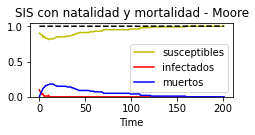

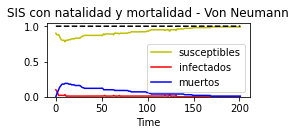

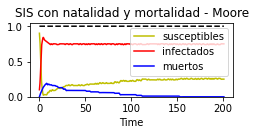

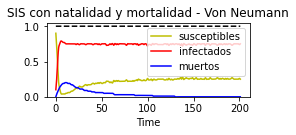

In [17]:
system1 = initialCondition(0.1,np.zeros((10,10)))
ranges = [[1,25,0.4],[25,64,0.4],[65,90,0.2]]
ages_sys1 = agesMatrix(ranges,system1)

mr = [[1,14,0.0005],[15,69,0.02],[70,100,0.15]]
br = 2

plt.subplot(2,2,1)
sm_1 = models("sis_birthAndMortavility",0.2,0.05,system1,Moore)
sm_1.birthRate = br; sm_1.probabilityOfDyingByAgeGroup = mr
sm_1.systemAges = ages_sys1; sm_1.annualUnit = 365
sm_1.metricsPlot(200,"SIS con natalidad y mortalidad - Moore")

plt.subplot(2,2,2)
svn_1 = models("sis_birthAndMortavility",0.2,0.05,system1,Von_Neumann)
svn_1.birthRate = br; svn_1.probabilityOfDyingByAgeGroup = mr
svn_1.systemAges = ages_sys1; svn_1.annualUnit = 365
svn_1.metricsPlot(200,"SIS con natalidad y mortalidad - Von Neumann")

plt.subplot(2,2,1)
sm_2 = models("sis_birthAndMortavility",0.2,0.5,system1,Moore)
sm_2.birthRate = br; sm_2.probabilityOfDyingByAgeGroup = mr
sm_2.systemAges = ages_sys1; sm_2.annualUnit = 365
sm_2.metricsPlot(200,"SIS con natalidad y mortalidad - Moore")

plt.subplot(2,2,2)
svn_2 = models("sis_birthAndMortavility",0.2,0.5,system1,Von_Neumann)
svn_2.birthRate = br; svn_2.probabilityOfDyingByAgeGroup = mr
svn_2.systemAges = ages_sys1; svn_2.annualUnit = 365
svn_2.metricsPlot(200,"SIS con natalidad y mortalidad - Von Neumann")

![texto del enlace](https://docs.google.com/drawings/d/e/2PACX-1vS7ICHAzGgiDie9tsl0_laD-fNVN2ROSMcWion5EpqYs_c6qqvxM3QhCi7xKT_naHQRGdzwzAdx_HXr/pub?w=697&h=516)

Observe que la enfermedad B termina desapareciendo, mientras que la enfermedad F se convierte en una endemia. Esto se debe a que los parámetros en el caso de la enfermedad E y en el contexto del modelo $SIS$ clásico, implican que la enfermedad termina desapareciendo mientras que en el caso de la enfermedad F ocurre todo lo contrario.

### El modelo $SIR$ con natalidad y mortalidad

Al igual que en el modelo anterior, implementamos la noción de estado de receso o "muerte", identificaremos este estado de receso con la letra $D$, el siguiente diagrama nos permitirá comprender la manera en la que se construye el modelo $SIR$ con natalidad y mortalidad:

Para poder diseñar las reglas de evolución que gobiernan el comportamiento del modelo $SIR$ con natalidad y mortalidad, implementamos las nociones de edad, tasas de natalidad y mortalidad por grupos de edad descritas anteriormente. Adicionalmente, se tomo en cuenta la regla de evolución para AC con edades (ver el esquema para la evolución de sistemas con edades) para modelar correctamente la evolución de esta característica.

Consideremos ahora dos sistemas no lineales con 100 individuos cada uno, ambas poblaciones se agrupan en tres grandes grupos de edad: Un $40\%$ son menores de 25 años, un $20\%$ son mayores de 65 años y el $40\%$ restante corresponde con los individuos que tienen entre 25 y 64 años. Supondremos además que los menores de 15 años tienen una probabilidad de morir del $0.05\%$, los mayores de 70 un $15\%$ y los que tienen entre 15 y 69 una probabilidad de fallecimiento del $2\%$.

*   **La enfermedad G:** Posee una tasa de infección del $5\%$ ($\beta=0.05$) y una tasa de recuperación $\alpha$ del $20\%$. Esta enfermedad afecta únicamente al primer sistema, el cual cuenta con un promedio de 2 nacimientos por individuo.
*   **La enfermedad H:** Posee las mismas características que la enfermedad G, con la diferencia de que su tasa de infección es del $50\%$ y afecta únicamente al segundo sistema.

Analizamos el comportamiento de cada enfermedad en un periodo de 200 días sobre sistemas del tipo cuadrado, considerando una población infectada inicial del $10\%$.

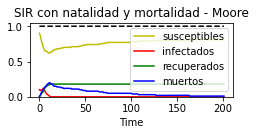

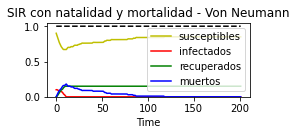

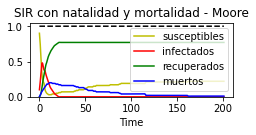

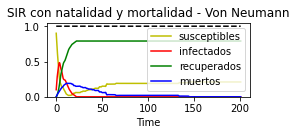

In [18]:
system1 = initialCondition(0.1,np.zeros((10,10)))
ranges = [[1,25,0.4],[25,64,0.4],[65,90,0.2]]
ages_sys1 = agesMatrix(ranges,system1)

mr = [[1,14,0.0005],[15,69,0.02],[70,100,0.15]]
br = 2

plt.subplot(2,2,1)
sm_1 = models("sir_birthAndMortavility",0.2,0.05,system1,Moore)
sm_1.birthRate = br; sm_1.probabilityOfDyingByAgeGroup = mr
sm_1.systemAges = ages_sys1; sm_1.annualUnit = 365
sm_1.metricsPlot(200,"SIR con natalidad y mortalidad - Moore")

plt.subplot(2,2,2)
svn_1 = models("sir_birthAndMortavility",0.2,0.05,system1,Von_Neumann)
svn_1.birthRate = br; svn_1.probabilityOfDyingByAgeGroup = mr
svn_1.systemAges = ages_sys1; svn_1.annualUnit = 365
svn_1.metricsPlot(200,"SIR con natalidad y mortalidad - Von Neumann")

plt.subplot(2,2,1)
sm_2 = models("sir_birthAndMortavility",0.2,0.5,system1,Moore)
sm_2.birthRate = br; sm_2.probabilityOfDyingByAgeGroup = mr
sm_2.systemAges = ages_sys1; sm_2.annualUnit = 365
sm_2.metricsPlot(200,"SIR con natalidad y mortalidad - Moore")

plt.subplot(2,2,2)
svn_2 = models("sir_birthAndMortavility",0.2,0.5,system1,Von_Neumann)
svn_2.birthRate = br; svn_2.probabilityOfDyingByAgeGroup = mr
svn_2.systemAges = ages_sys1; svn_2.annualUnit = 365
svn_2.metricsPlot(200,"SIR con natalidad y mortalidad - Von Neumann")

![texto del enlace](https://docs.google.com/drawings/d/e/2PACX-1vS9K4WcfOM2kgpaR0aK4xUglFZRIjD79Zg1RAiZw9DCGbOXddZfMvEQgBtLTPg8aY_Iea-GL229ZtnI/pub?w=703&h=526)

Al igual que como ocurrió en el caso de las enfermedades E y F en el modelo $SIS$ con natalidad y mortalidad, la enfermedad G termina desapareciendo al poco tiempo de iniciar el estudio mientras que la enfermedad alcanza un pico en las primeras semanas para desaparecer posteriormente. Estos comportamientos se deben a los valores de los parámetros que definen cada enfermedad y a sus implicaciones en el modelo $SIR$ clásico.

## Modelos $SIS$ y $SIR$ con muerte por enfermedad

Para construir las reglas de evolución de ambos modelos $SIS$ y $SIR$ con muerte por enfermedad, decidimos implementar los conceptos de edad, tasas de natalidad y mortalidad por grupo de edad e implementarlos de la misma manera que en la sección anterior, adicionalmente implementamos un tipo de tasas que se comporta de manera similar a las tasas de mortalidad por grupo de edad, sin embargo estás afectarán únicamente al estado de infección. A continuación podremos visualizar de manera general, la manera en la que se implementaron las *tasas de mortalidad por enfermedad por grupo de edad*:

### El modelo $SIS$ con muerte por enfermedad

El siguiente diagrama nos ayudará a comprender la manera en la que se implementaron las reglas de evolución para el modelo $SIS$ con muerte por enfermedad:

Donde al igual que en los modelos con natalidad y mortalidad, identificamos a las tasas de mortalidad por grupo de edad con $\mu_2$ y la tasa de natalidad con $\mu_1$, identificaremos además a la tasa de mortalidad por enfermedad por grupo de edad con la letra griega $\theta$.

A continuación analizaremos dos casos particulares, cada uno de ellos definidos con parámetros $\alpha$ y $\beta$ de modo que al analizarlos en el contexto del modelo clásico obtengamos valores para el indicador $R_0$ mayor y menor a la unidad, recordando que $R_0=\frac{\beta}{\alpha}$.

Partiremos de dos sistemas no lineales, cada uno de 100 individuos de modo que el $40\%$ es menor de 25 años, un $20\%$ es mayor de 65 años y el $40\%$ corresponde a los individuos que tienen entre 25 y 64 años, supondremos que por cada individuo nacen en promedio 2 agentes y que las probabilidades de muerte por grupo de edad estarán dadas por la siguiente tabla:

*   **La enfermedad I:** Posee una tasa de infección $\beta$ del $5\%$ y una tasa de recuperación $\alpha=0.2$, esta enfermedad esta presente únicamente en el primer sistema y afecta principalmente a individuos mayores de 79 años, llegando a ocasionarles la muerte en un $80\%$ de los casos, tenemos también a los individuos que tienen entre 46 y 78 años, para este grupo tenemos una probabilidad del $35\%$ de fallecimiento, mientras que para los que tienen entre 21 y 45 años tenemos el $15\%$, por último tenemos a los menores de 21 años, los cuales tienen una probabilidad del $8\%$ de morir por causa de la enfermedad.
*   **La enfermedad J:** Afecta únicamente al segundo sistema y actúa de manera similar a la enfermedad I, con la diferencia de que su tasa de contagio $\beta$ es del $50\%$.

Analizamos el comportamiento de ambas enfermedades sobre un sistema cuadrado en un periodo de 200 días, obteniendo así los siguientes resultados:

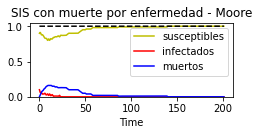

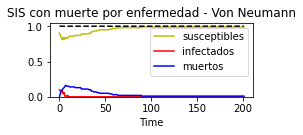

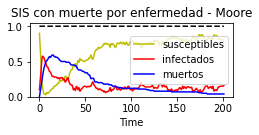

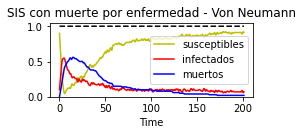

In [19]:
system3 = initialCondition(0.1,np.zeros((10,10)))

ranges = [[1,25,0.4],[25,64,0.4],[65,90,0.2]]
mr = [[1,14,0.0005],[15,69,0.02],[70,100,0.15]]
br = 2
ages_sys3 = agesMatrix(ranges,system3)
ranges_dead = [[1,20,0.08],[21,45,0.15],[46,78,0.35],[79,100,0.8]]

plt.subplot(2,2,1)
sm_1 = models("sis_deathByDisease",0.2,0.05,system3,Moore)
sm_1.birthRate = br; sm_1.probabilityOfDyingByAgeGroup = mr
sm_1.deathFromDiseaseByAgeRange = ranges_dead
sm_1.systemAges = ages_sys3; sm_1.annualUnit = 365
sm_1.metricsPlot(200,"SIS con muerte por enfermedad - Moore")

plt.subplot(2,2,2)
svn_1 = models("sis_deathByDisease",0.2,0.05,system3,Von_Neumann)
svn_1.birthRate = br; svn_1.probabilityOfDyingByAgeGroup = mr
svn_1.deathFromDiseaseByAgeRange = ranges_dead
svn_1.systemAges = ages_sys3; svn_1.annualUnit = 365
svn_1.metricsPlot(200,"SIS con muerte por enfermedad - Von Neumann")

plt.subplot(2,2,3)
sm_2 = models("sis_deathByDisease",0.2,0.5,system3,Moore)
sm_2.birthRate = br; sm_2.probabilityOfDyingByAgeGroup = mr
sm_2.deathFromDiseaseByAgeRange = ranges_dead
sm_2.systemAges = ages_sys3; sm_2.annualUnit = 365
sm_2.metricsPlot(200,"SIS con muerte por enfermedad - Moore")

plt.subplot(2,2,4)
svn_2 = models("sis_deathByDisease",0.2,0.5,system3,Von_Neumann)
svn_2.birthRate = br; svn_2.probabilityOfDyingByAgeGroup = mr
svn_2.deathFromDiseaseByAgeRange = ranges_dead
svn_2.systemAges = ages_sys3; svn_2.annualUnit = 365
svn_2.metricsPlot(200,"SIS con muerte por enfermedad - Von Neumann")

![texto del enlace](https://docs.google.com/drawings/d/e/2PACX-1vSeipC9HyWTQ0ofIow4P1kmGjZQG9Britw9ct-y0sbOoXYi5GePAN4Aav0NCsA6W1xflLYAJzZH4gkd/pub?w=706&h=515)

Podemos observar que en el caso de la enfermedad I, debido al valor $R_0$ en el contexto del modelo $SIS$ clásico, implica la desaparición de la enfermedad $R_0=\frac{\beta}{\alpha}< 1$. Por otro lado tenemos a la enfermedad J, en donde $R_0>1$ implicando una posible endemia, la cual es evidenciada en la figura b.

### El modelo $SIR$ con muerte por enfermedad

Usando la notación que se definió para el modelo $SIS$ con muerte por enfermedad, podemos entender el comportamiento del modelo $SIR$ con muerte por enfermedad como se muestra en el siguiente diagrama:

Recordemos que en el caso del modelo $SIR$ clásico, si para una enfermedad particular teníamos un valor de $R_0$ menor que la unidad, está terminaría desapareciendo poco después de iniciar el estudio. Por otro lado si $R_0>1$, la enfermedad alcanzaría un pico para posteriormente tender a su punto de equilibrio [1]. Teniendo esto en mente, analizaremos dos enfermedades de modo que los parámetros que las definan, nos permitan visualizar la manera en que se implementaron las reglas para el modelo $SIR$ con muerte por enfermedad y sus implicaciones para el análisis epidemiológico.

Al igual que en el modelo $SIS$ con muerte por enfermedad, partiremos de dos sistemas no lineales, cada uno de 100 individuos de modo que el $40\%$ es menor de 25 años, un $20\%$ es mayor de 70 años y el $40\%$ corresponde a los individuos que tienen entre 15 y 69 años, supondremos que por cada individuo nacen en promedio 2 agentes y que las probabilidades de muerte por grupo de edad estarán dadas por la siguiente tabla:

*   **La enfermedad K:** Posee una tasa de recuperación del $20\%$ y tasa de infección $\beta$ del $5\%$, esta enfermedad esta presente únicamente en el primer sistema afectando principalmente a individuos mayores de 79 años, llegando a ocasionarles la muerte en un $80\%$ de los casos, tenemos también a los individuos que tienen entre 46 y 78 años, para este grupo tenemos una probabilidad del $35\%$ de fallecimiento, mientras que para los que tienen entre 21 y 45 años tenemos el $15\%$, por último tenemos a los menores de 21 años, los cuales tienen una probabilidad del $8\%$ de morir por causa de la enfermedad.
*   **La enfermedad L:** Afecta únicamente al segundo sistema, actuando de manera similar que la enfermedad K con la diferencia de que su tasa de infección $\beta$ es del $50\%$.

Analizamos el comportamiento de ambas enfermedades en un periodo de 200 días, sobre dos sistemas cuadrados tomando como población infectada a un $10\%$ de la población.

Del lado izquierdo de la siguiente figura podremos observar el comportamiento de la enfermedad K, resaltando la idea de que su evolución se debe a la naturaleza de los parámetros que definen tal enfermedad ($\alpha$ y $\beta$ son tales que $R_0=\frac{\beta}{\alpha}< 1$), del mismo modo para la enfermedad L (en esta caso $R_0=\frac{\beta}{\alpha}> 1$).

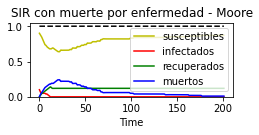

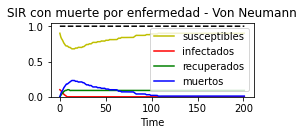

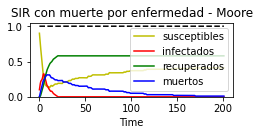

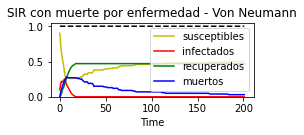

In [20]:
system3 = initialCondition(0.1,np.zeros((10,10)))

ranges = [[1,25,0.4],[25,64,0.4],[65,90,0.2]]
mr = [[1,14,0.0005],[15,69,0.02],[70,100,0.15]]
br = 2
ages_sys3 = agesMatrix(ranges,system3)
ranges_dead = [[1,20,0.08],[21,45,0.15],[46,78,0.35],[79,100,0.8]]

plt.subplot(2,2,1)
sm_1 = models("sir_deathByDisease",0.2,0.05,system3,Moore)
sm_1.birthRate = br; sm_1.probabilityOfDyingByAgeGroup = mr
sm_1.deathFromDiseaseByAgeRange = ranges_dead
sm_1.systemAges = ages_sys3; sm_1.annualUnit = 365
sm_1.metricsPlot(200,"SIR con muerte por enfermedad - Moore")

plt.subplot(2,2,2)
svn_1 = models("sir_deathByDisease",0.2,0.05,system3,Von_Neumann)
svn_1.birthRate = br; svn_1.probabilityOfDyingByAgeGroup = mr
svn_1.deathFromDiseaseByAgeRange = ranges_dead
svn_1.systemAges = ages_sys3; svn_1.annualUnit = 365
svn_1.metricsPlot(200,"SIR con muerte por enfermedad - Von Neumann")

plt.subplot(2,2,3)
sm_2 = models("sir_deathByDisease",0.2,0.5,system3,Moore)
sm_2.birthRate = br; sm_2.probabilityOfDyingByAgeGroup = mr
sm_2.deathFromDiseaseByAgeRange = ranges_dead
sm_2.systemAges = ages_sys3; sm_2.annualUnit = 365
sm_2.metricsPlot(200,"SIR con muerte por enfermedad - Moore")

plt.subplot(2,2,4)
svn_2 = models("sir_deathByDisease",0.2,0.5,system3,Von_Neumann)
svn_2.birthRate = br; svn_2.probabilityOfDyingByAgeGroup = mr
svn_2.deathFromDiseaseByAgeRange = ranges_dead
svn_2.systemAges = ages_sys3; svn_2.annualUnit = 365
svn_2.metricsPlot(200,"SIR con muerte por enfermedad - Von Neumann")

![texto del enlace](https://docs.google.com/drawings/d/e/2PACX-1vQAQhw8uEQOJCa-UQYcGvsUBeWWjJyVes7EzzamTtEt9upxxyzl0AyQ23yrh9e-CVnUVStOAa7IJcxI/pub?w=694&h=526)

## El movimiento

Hasta el momento hemos analizado únicamente sistemas estáticos, es decir, sistemas en los cuales sus agentes no tienen la posibilidad de moverse. Esto implica que la cantidad de vecinos y la manera en la que interactúa es invariante con respecto al tiempo, esto puede llegar a ser una limitación para modelar sistemas reales debido a que no necesariamente se mantienen constantes las cantidades de vecinos para cada agente y esto podría llegar generar cambios en la manera en la que evoluciona la enfermedad.

Por tal razón se diseño una estrategia para simular el movimiento de los agentes, partimos del supuesto de que los agentes tienen una probabilidad de moverse la cual dependerá del estado que caracterice al agente. Supongamos por ejemplo que queremos modelar una enfermedad similar a la varicela, claramente los individuos que la posean no se van a desplazar por el espacio de la misma manera que un individuo que no la tiene. 

Teniendo esto en mente diseñamos un algoritmo que nos permitirá simular el movimiento de los agentes, el cual dependerá estrictamente del estado con el cual cuente cada agente. Inicialmente debemos tener claro los lugares a los cuales se podrán desplazar los agentes, en nuestra simulación usamos el color azul para diferenciar estos espacios de posible desplazamiento. A continuación mostramos un diagrama que nos permitirá comprender la manera en la cual actúa el movimiento sobre el sistema: 

### Movimiento aleatorio para cada iteración

In [ ]:
#-----El movimiento-----

def superposicion(A,B):   #Permiete visualizar dos sistemas sobre un mismo dominio 
    n,m=A.shape
    C=-np.ones((n,m))
    for i in range(n):
        for j in range(m):
            C[i,j]=A[i,j]
            if C[i,j]==-1:
                C[i,j]=B[i,j]
    return C

def transport(output,arrival,ages,list_prob):     #Todos los agentes tendrán una probabilidad de moverse, de acuerdo con el estado que posea
    n,m=output.shape
    A=output; B=arrival; E=ages
    A1=np.zeros((n,m)); B1=np.zeros((n,m)); E1=-np.ones((n,m))
    V1=[]
    for i in range(n):        #Se realiza para evitar ṕroblemas de apuntadores
        for j in range(m):
            A1[i,j]=A[i,j]
            B1[i,j]=B[i,j]
            E1[i,j]=E[i,j]
    for i in range(list_prob[0][0],list_prob[len(list_prob)-1][0]+1):
        V1.append(state_coor(A,i))
    for i in range(len(V1)):
        V2=state_coor(B1,75)
        for j in range(len(V1[i])):
            p=random.randint(0,100)
            if p <= list_prob[i][1]*100:
                k=random.randint(0,len(V1[i])-1)
                l=random.randint(0,len(V2)-1)
                A1[V1[i][k][0]][V1[i][k][1]]=B[V2[l][0]][V2[l][1]]
                B1[V2[l][0]][V2[l][1]]=A[V1[i][k][0]][V1[i][k][1]]
                E1[V1[i][k][0]][V1[i][k][1]]=E[V2[l][0]][V2[l][1]]
                E1[V2[l][0]][V2[l][1]]=E[V1[i][k][0]][V1[i][k][1]]
                V1[i].pop(k); V2.pop(l)
    return [A1,B1,E1]

In [ ]:
#-----El modelo SIS con movimiento-----

def evolution_sis_wm(alpha,beta,list_prob,br,mr,ranges_dead,A,B,E,time_unit,year,p,q,function):    #Regla de evolución para el modelo SIS con movimiento de agentes
    C=transport(A,B,E,list_prob)
    C=transport(C[1],C[0],C[2],list_prob)
    K=C[2]
    D=evolution_sis_dd(alpha,beta,br,mr,ranges_dead,C[0],K,time_unit,year,p,q,function)
    E=evolution_sis_dd(alpha,beta,br,mr,ranges_dead,C[1],K,time_unit,year,p,q,function)
    n,m=A.shape
    for i in range(n):
        for j in range(m):
            if C[0][i,j]==75:
                D[0][i,j]=75
            if C[1][i,j]==75:
                E[0][i,j]=75
            if C[2][i,j]==0:
                D[0][i,j]=3
                E[0][i,j]=3
    K=superposicion(D[1],E[1])
    for i in range(n):
        for j in range(m):
            if D[0][i][j]==3 or E[0][i][j]==3:
                K[i][j]=0
    return [D[0],E[0],K]

def evolution_SIS_wm(alpha,beta,tf,list_prob,br,mr,ranges_dead,A,B,E,year,p,q,function):   #Aplica el modelo SIS con movimiento tf veces sobre los sitemas A y B
    L1=[A]; L2=[B]; L3=[E]
    for i in range(1,tf):
        M=evolution_sis_wm(alpha,beta,list_prob,br,mr,ranges_dead,L1[i-1],L2[i-1],L3[i-1],i,year,p,q,function)
        L1.append(M[0])
        L2.append(M[1])
        L3.append(M[2])
    return [L1,L2,L3]

def SIS_wm_model(alpha,beta,tf,list_prob,br,mr,ranges_dead,A,B,E,year,p,q,function):   #Modelo SIS con movimiento
    S=[]; I=[]; D=[]           
    CI=np.zeros((tf,2))           
    CS=np.zeros((tf,2))           
    CD=np.zeros((tf,2))
    C=evolution_SIS_wm(alpha,beta,tf,list_prob,br,mr,ranges_dead,A,B,E,year,p,q,function)
    for i in range(tf):
        M=superposicion(C[0][i],C[1][i])
        S.append(count_s(M))      
        I.append(count_i(M))   
        D.append(count_d(M))
    for i in range(tf):           
        CS[i][0]=i; CS[i][1]=S[i]   
        CI[i][0]=i; CI[i][1]=I[i]   
        CD[i][0]=i; CD[i][1]=D[i]   
    return [CS,CI,CD,S,I,D,C]

def graph_sis_wm(alpha,beta,tf,list_prob,br,mr,ranges_dead,A,B,E,year,p,q,function):   #Gráfica del modelo SIS con movimiento
    SIS=SIS_wm_model(alpha,beta,tf,list_prob,br,mr,ranges_dead,A,B,E,year,p,q,function)
    three_states_graph_2(SIS[0],SIS[1],SIS[2], "Modelo SIS con movimiento") 

In [ ]:
#-----El modelo SIR con movimiento-----

def evolution_sir_wm(alpha,beta,list_prob,br,mr,ranges_dead,A,B,E,time_unit,year,p,q,function):   #Regla de evolución para el modelo SIR con movimiento de agentes
    C=transport(A,B,E,list_prob)
    C=transport(C[1],C[0],C[2],list_prob)
    K=C[2]
    D=evolution_sir_dd(alpha,beta,br,mr,ranges_dead,C[0],K,time_unit,year,p,q,function)
    E=evolution_sir_dd(alpha,beta,br,mr,ranges_dead,C[1],K,time_unit,year,p,q,function)
    n,m=A.shape
    for i in range(n):
        for j in range(m):
            if C[0][i,j]==75:
                D[0][i,j]=75
            if C[1][i,j]==75:
                E[0][i,j]=75
            if C[2][i,j]==0:
                D[0][i,j]=3
                E[0][i,j]=3
    K=superposicion(D[1],E[1])
    for i in range(n):
        for j in range(m):
            if D[0][i][j]==3 or E[0][i][j]==3:
                K[i][j]=0
    return [D[0],E[0],K]

def evolution_SIR_wm(alpha,beta,tf,list_prob,br,mr,ranges_dead,A,B,E,year,p,q,function):   #Aplica el modelo SIR con movimiento tf veces sobre los sitemas A y B
    L1=[A]; L2=[B]; L3=[E]
    for i in range(1,tf):
        M=evolution_sir_wm(alpha,beta,list_prob,br,mr,ranges_dead,L1[i-1],L2[i-1],L3[i-1],i,year,p,q,function)
        L1.append(M[0])
        L2.append(M[1])
        L3.append(M[2])
    return [L1,L2,L3]

def SIR_wm_model(alpha,beta,tf,list_prob,br,mr,ranges_dead,A,B,E,year,p,q,function):   #Modelo SIR con movimiento
    S=[]; I=[]; R=[]; D=[]           
    CI=np.zeros((tf,2))           
    CS=np.zeros((tf,2))           
    CR=np.zeros((tf,2)) 
    CD=np.zeros((tf,2))
    C=evolution_SIR_wm(alpha,beta,tf,list_prob,br,mr,ranges_dead,A,B,E,year,p,q,function)
    for i in range(tf):
        M=superposicion(C[0][i],C[1][i])
        S.append(count_s(M))      
        I.append(count_i(M))   
        R.append(count_r(M))  
        D.append(count_d(M))
    for i in range(tf):           
        CS[i][0]=i; CS[i][1]=S[i]   
        CI[i][0]=i; CI[i][1]=I[i]   
        CR[i][0]=i; CR[i][1]=R[i]
        CD[i][0]=i; CD[i][1]=D[i]   
    return [CS,CR,CI,CD,S,I,R,D,C]

def graph_sir_wm(alpha,beta,tf,list_prob,br,mr,ranges_dead,A,B,E,year,p,q,function):   #Gráfica del modelo SIR con movimiento
    SIR=SIR_wm_model(alpha,beta,tf,list_prob,br,mr,ranges_dead,A,B,E,year,p,q,function)
    four_states_graph(SIR[0],SIR[2],SIR[1],SIR[3], "Modelo SIR con movimiento") 

### Movimiento aleatorio estableciendo los periodos de inmigración 

In [ ]:
def carta(A):
  n,m = A.shape
  c = []
  for i in range(n):
      for j in range(m):
          if A[i,j]!=-1:
              c.append([i,j,i,j])
  return c

def transport(output,arrival,ages_system,list_prob,cartas):     #Todos los agentes tendrán una probabilidad de moverse, de acuerdo con el estado que posea
    n,m=output.shape
    A=output; B=arrival; E=ages_system
    A1=np.zeros((n,m)); B1=np.zeros((n,m)); E1=-np.ones((n,m))
    V1=[]
    for i in range(n):        #Se realiza para evitar ṕroblemas de apuntadores
        for j in range(m):
            A1[i,j]=A[i,j]
            B1[i,j]=B[i,j]
            E1[i,j]=E[i,j]
    
    c=[]
    for i in range(list_prob[0][0],list_prob[len(list_prob)-1][0]+1):
        V1.append(state_coor(A,i))
    for i in range(len(V1)):
        V2=state_coor(B1,75)
        for j in range(len(V1[i])):
            p=random.randint(0,100)
            if p <= list_prob[i][1]*100:
                k=random.randint(0,len(V1[i])-1)
                l=random.randint(0,len(V2)-1)
                A1[V1[i][k][0]][V1[i][k][1]]=B[V2[l][0]][V2[l][1]]
                B1[V2[l][0]][V2[l][1]]=A[V1[i][k][0]][V1[i][k][1]]
                E1[V1[i][k][0]][V1[i][k][1]]=E[V2[l][0]][V2[l][1]]
                E1[V2[l][0]][V2[l][1]]=E[V1[i][k][0]][V1[i][k][1]]
                c.append([V1[i][k][0],V1[i][k][1],V2[l][0],V2[l][1]])
                V1[i].pop(k); V2.pop(l)
    for i in c:
        for j in cartas:
            if i[0]==j[0] and i[1]==j[1]:
                j[2]=i[2]; j[3]=i[3]
    for i in range(n):
        for j in range(m):
            if A1[i,j]!=-1:
                B1[i,j]=-1
            if B1[i,j]!=-1:
                A1[i,j]=-1
    return [A1,B1,E1,cartas]

def retorno(output,arrival,ages,cartas):
    n,m=output.shape
    A=output; B=arrival; E=ages
    A1=np.zeros((n,m)); B1=np.ones((n,m))*75; E1=-np.ones((n,m))
    for i in range(n):        #Se realiza para evitar problemas de apuntadores
        for j in range(m):
            A1[i,j]=A[i,j]
            E1[i,j]=E[i,j]
    for i in cartas:
        if A1[i[0],i[1]]==75:
            A1[i[0],i[1]]=B[i[2],i[3]]
            A1[i[2],i[3]]=-1
            E1[i[0],i[1]]=E[i[2],i[3]]          
    return [A1,B1,E1,carta(A1)]   

In [ ]:
#-----El modelo SIS con movimiento-----

def evolution_sis_wm_t(alpha,beta,br,mr,ranges_dead,A,B,E,list_prob,cartas,time_unit,year,p,q,function):    #Regla de evolución para el modelo SIR con movimiento de agentes
    C=transport(A,B,E,list_prob,cartas)
    P=C[2]
    n,m = A.shape
    A1 = -np.ones((n,m)); B1 = -np.ones((n,m))
    for i in range(n):
      for j in range(m):
        A1[i,j]=C[0][i,j]
        B1[i,j]=C[1][i,j]
        if A1[i,j]==75:
          A1[i,j]=-1
        if B1[i,j]==75:
          B1[i,j]=-1
    D=evolution_sis_dd(alpha,beta,br,mr,ranges_dead,A1,P,time_unit,year,p,q,function)
    F=evolution_sis_dd(alpha,beta,br,mr,ranges_dead,B1,P,time_unit,year,p,q,function)
    K=-np.ones((n,m))
    for i in range(n):
      for j in range(m):
        if D[1][i,j]!=-1:
          K[i,j]=D[1][i,j]
        if F[1][i,j]!=-1:
          K[i,j]=F[1][i,j]   
    for i in range(n):
      for j in range(m):
        if C[0][i,j]==75:
          D[0][i,j]=75
        if C[1][i,j]==75:
          F[0][i,j]=75
    return [D[0],F[0],K,C[3]]

def evolution_sis_wm_r(alpha,beta,br,mr,ranges_dead,A,B,E,cartas,time_unit,year,p,q,function):    #Regla de evolución para el modelo SIR con movimiento de agentes
    C=retorno(A,B,E,cartas)
    P=C[2]
    D=evolution_sis_dd(alpha,beta,br,mr,ranges_dead,C[0],P,time_unit,year,p,q,function)
    return [D[0],C[1],D[1],C[3]]

def evolution_sis_wm(alpha,beta,br,mr,ranges_dead,A,B,E,list_prob,cartas,time_unit,year,text,p,q,function):
    if str(text)=="T":
      P = evolution_sis_wm_t(alpha,beta,br,mr,ranges_dead,A,B,E,list_prob,cartas,time_unit,year,p,q,function)
    elif str(text)=="R":
      P = evolution_sis_wm_r(alpha,beta,br,mr,ranges_dead,A,B,E,cartas,time_unit,year,p,q,function)
    for i in range(n):
      for j in range(m):
        if A[i,j]==-1:
          P[0][i,j]=-1
        if B[i,j]==-1:
          P[1][i,j]=-1
    return P

def evolution_SIS_wm(alpha,beta,br,mr,ranges_dead,A,B,E,tf,list_prob,cartas,year,list_text,p,q,function):   #Aplica el modelo SIS con movimiento tf veces sobre los sitemas A y B
    L1=[A]; L2=[B]; L3=[E]; C=[cartas]
    for i in range(1,tf):
        M=evolution_sis_wm(alpha,beta,br,mr,ranges_dead,L1[i-1],L2[i-1],L3[i-1],list_prob,C[i-1],i,year,list_text[i-1],p,q,function)
        L1.append(M[0])
        L2.append(M[1])
        L3.append(M[2])
        C.append(M[3])
    return [L1,L2,L3,C]

def SIS_wm_model(alpha,beta,br,mr,ranges_dead,A,B,E,tf,list_prob,cartas,year,list_text,p,q,function):   #Modelo SIS con movimiento
    S=[]; I=[]; D=[]           
    CI=np.zeros((tf,2))           
    CS=np.zeros((tf,2))           
    CD=np.zeros((tf,2))
    C=evolution_SIS_wm(alpha,beta,br,mr,ranges_dead,A,B,E,tf,list_prob,cartas,year,list_text,p,q,function)
    for i in range(tf):
        M=superposicion(C[0][i],C[1][i])
        S.append(count_s(M))      
        I.append(count_i(M))   
        D.append(count_d(M))
    for i in range(tf):           
        CS[i][0]=i; CS[i][1]=S[i]   
        CI[i][0]=i; CI[i][1]=I[i]   
        CD[i][0]=i; CD[i][1]=D[i]   
    return [CS,CI,CD,S,I,D,C]

In [ ]:
#-----El modelo SIR con movimiento-----

def evolution_sir_wm_t(alpha,beta,br,mr,ranges_dead,A,B,E,list_prob,cartas,time_unit,year,p,q,function):    #Regla de evolución para el modelo SIR con movimiento de agentes
    C=transport(A,B,E,list_prob,cartas)
    P=C[2]
    n,m = A.shape
    A1 = -np.ones((n,m)); B1 = -np.ones((n,m))
    for i in range(n):
      for j in range(m):
        A1[i,j]=C[0][i,j]
        B1[i,j]=C[1][i,j]
        if A1[i,j]==75:
          A1[i,j]=-1
        if B1[i,j]==75:
          B1[i,j]=-1
    D=evolution_sir_dd(alpha,beta,br,mr,ranges_dead,A1,P,time_unit,year,p,q,function)
    F=evolution_sir_dd(alpha,beta,br,mr,ranges_dead,B1,P,time_unit,year,p,q,function)
    K=-np.ones((n,m))
    for i in range(n):
      for j in range(m):
        if D[1][i,j]!=-1:
          K[i,j]=D[1][i,j]
        if F[1][i,j]!=-1:
          K[i,j]=F[1][i,j]   
    for i in range(n):
      for j in range(m):
        if C[0][i,j]==75:
          D[0][i,j]=75
        if C[1][i,j]==75:
          F[0][i,j]=75
    return [D[0],F[0],K,C[3]]

def evolution_sir_wm_r(alpha,beta,br,mr,ranges_dead,A,B,E,cartas,time_unit,year,p,q,function):    #Regla de evolución para el modelo SIR con movimiento de agentes
    C=retorno(A,B,E,cartas)
    P=C[2]
    D=evolution_sir_dd(alpha,beta,br,mr,ranges_dead,C[0],P,time_unit,year,p,q,function)
    return [D[0],C[1],D[1],C[3]]

def evolution_sir_wm(alpha,beta,br,mr,ranges_dead,A,B,E,list_prob,cartas,time_unit,year,text,p,q,function):
    if str(text)=="T":
      P = evolution_sir_wm_t(alpha,beta,br,mr,ranges_dead,A,B,E,list_prob,cartas,time_unit,year,p,q,function)
    elif str(text)=="R":
      P = evolution_sir_wm_r(alpha,beta,br,mr,ranges_dead,A,B,E,cartas,time_unit,year,p,q,function)
    n,m=A.shape
    for i in range(n):
      for j in range(m):
        if A[i,j]==-1:
          P[0][i,j]=-1
        if B[i,j]==-1:
          P[1][i,j]=-1
    return P

def evolution_SIR_wm(alpha,beta,br,mr,ranges_dead,A,B,E,tf,list_prob,cartas,year,list_text,p,q,function):   #Aplica el modelo SIS con movimiento tf veces sobre los sitemas A y B
    L1=[A]; L2=[B]; L3=[E]; C=[cartas]
    for i in range(1,tf):
        M=evolution_sir_wm(alpha,beta,br,mr,ranges_dead,L1[i-1],L2[i-1],L3[i-1],list_prob,C[i-1],i,year,list_text[i-1],p,q,function)
        L1.append(M[0])
        L2.append(M[1])
        L3.append(M[2])
        C.append(M[3])
    return [L1,L2,L3,C]

def SIR_wm_model(alpha,beta,br,mr,ranges_dead,A,B,E,tf,list_prob,cartas,year,list_text,p,q,function):   #Modelo SIR con movimiento
    S=[]; I=[]; R=[]; D=[]           
    CI=np.zeros((tf,2))           
    CS=np.zeros((tf,2))           
    CR=np.zeros((tf,2)) 
    CD=np.zeros((tf,2))
    C=evolution_SIR_wm(alpha,beta,br,mr,ranges_dead,A,B,E,tf,list_prob,cartas,year,list_text,p,q,function)
    for i in range(tf):
        M=superposicion(C[0][i],C[1][i])
        S.append(count_s(M))      
        I.append(count_i(M)) 
        R.append(count_r(M))   
        D.append(count_d(M))
    for i in range(tf):           
        CS[i][0]=i; CS[i][1]=S[i]   
        CI[i][0]=i; CI[i][1]=I[i]   
        CR[i][0]=i; CR[i][1]=R[i]
        CD[i][0]=i; CD[i][1]=D[i]   
    return [CS,CR,CI,CD,S,I,R,D,C]

##  El Covid-19 en la cárcel de Villavicencio


In [ ]:
#-----Definición del sistema-----

cv=-np.ones((80,71))
b1=domain_definition(8,5,65,64,cv)
b2=domain_definition(10,5,55,65,cv)
b3=domain_definition(4,4,50,64,cv)
b4=domain_definition(4,2,49,61,cv)
b5=domain_definition(4,9,50,51,cv)
b6=domain_definition(5,11,48,39,cv)
b7=domain_definition(6,22,41,40,cv)
b8=domain_definition(6,4,55,57,cv)
b9=domain_definition(10,6,55,50,cv); b9=domain_definition(7,2,58,48,b9); b9=domain_definition(3,4,58,45,b9)
b10=domain_definition(4,5,62,57,cv)
b11=domain_definition(5,7,70,55,cv); b11=domain_definition(4,2,71,53,b11)
b12=domain_definition(5,9,65,42,cv); b12=domain_definition(3,3,65,51,b12); b12=domain_definition(5,1,66,41,b12); b12=domain_definition(5,1,67,40,b12); b12=domain_definition(3,1,68,39,b12); b12=domain_definition(1,1,69,38,b12)
b13=domain_definition(1,4,64,38,cv); b13=domain_definition(1,2,63,39,b13); b13=domain_definition(1,4,65,37,b13); b13=domain_definition(1,4,66,36,b13); b13=domain_definition(1,4,67,35,b13); b13=domain_definition(1,4,68,34,b13); b13=domain_definition(1,2,69,35,b13)
b14=domain_definition(4,3,57,40,cv); b14=domain_definition(6,2,56,38,b14); b14=domain_definition(8,3,55,35,b14)
b15=domain_definition(7,10,34,37,cv)
b16=domain_definition(17,9,17,35,cv); b16=domain_definition(5,5,23,44,b16); b16=domain_definition(12,1,17,34,b16); b16=domain_definition(10,1,17,33,b16)
b17=domain_definition(3,11,75,21,cv)
b18=domain_definition(8,3,55,30,cv)
b19=domain_definition(5,6,66,26,cv)
b20=domain_definition(9,20,54,8,cv); b20=domain_definition(4,7,63,15,b20); b20=domain_definition(4,8,50,10,b20); b20=domain_definition(3,1,63,14,b20)
b21=domain_definition(3,2,60,28,cv)
b22=domain_definition(6,14,67,11,cv); b22=domain_definition(2,7,73,11,b22)
b23=domain_definition(6,4,47,4,cv)
b24=domain_definition(4,8,47,12,cv)

b25=domain_definition(13,1,38,23,cv); b25=domain_definition(5,1,44,22,b25); b25=domain_definition(1,1,46,21,b25)
b25=domain_definition(3,1,39,22,b25); b25=domain_definition(1,1,40,21,b25); b25=domain_definition(13,1,37,24,b25); b25=domain_definition(11,1,38,25,b25)
b25=domain_definition(9,1,39,26,b25); b25=domain_definition(7,1,40,27,b25); b25=domain_definition(7,1,39,28,b25); b25=domain_definition(7,1,38,29,b25)
b25=domain_definition(7,1,37,30,b25); b25=domain_definition(7,1,36,31,b25); b25=domain_definition(7,1,35,32,b25); b25=domain_definition(5,1,36,33,b25)
b25=domain_definition(3,1,37,34,b25); b25=domain_definition(1,1,38,35,b25)

b26=domain_definition(1,2,51,25,cv)
b27=domain_definition(4,3,48,28,cv)
b28=domain_definition(4,6,44,32,cv)
b29=domain_definition(6,4,30,5,cv); b29=domain_definition(6,4,32,9,b29)
b30=domain_definition(10,6,22,11,cv); b30=domain_definition(3,3,29,17,b30)
b31=domain_definition(6,10,12,18,cv)

#-----Condición inicial-----

b17=initial_condition(0.6,b17)

ecv=[b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,b11,b12,b13,b14,b15,b16,b17,b18,b19,b20,b21,b22,b23,b24,b25,b26,b27,b28,b29,b30,b31]
for i in range(len(ecv)):
    cv=superposicion(cv,ecv[i])

#-----Condiciones de la población-----

ranges = [[18,39,0.71],[40,69,0.21],[70,90,0.08]]
ages_cv = ages(ranges, cv)
rd = [[1,19,0.0018],[20,39,0.0047],[40,59,0.0259],[60,79,0.1481],[80,150,0.3014]]
lp = [[0,0.29],[1,0.15],[2,0.29]]
mr = [[15,19,0.00538],[20,24,0.00932],[25,29,0.00936],[30,34,0.0095],[35,39,0.01097],[40,44,0.01351],[45,49,0.01869],[50,54,0.02862],[55,59,0.04382],[60,64,0.06926],[65,69,0.11008],[70,74,0.17105],[75,79,0.264870],[80,150,1]]

plt.imshow(color(cv),cmap="nipy_spectral", interpolation='nearest')

In [ ]:
cvv=np.ones((80,71))
for i in range(80):
    for j in range(71):
        if cv[i,j]==-1:
            cvv[i,j]=75
        else: 
            cvv[i,j]=-1

plt.imshow(color(superposicion(cv,cvv)),cmap="nipy_spectral", interpolation='nearest')

In [ ]:
#-----Datos "reales"-----

D=[20,0,0,0,27,40,42,0,0,77,17,107,4,5,103,1,85,0,149,0,22,73,63,21,3,6,1,1,0,0,0,0,9,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0]
D1=[20]
for i in range(len(D)-1):
    D1.append(D1[i]+D[i+1])
Data=np.zeros((len(D),2))
Data1=np.zeros((len(D1),2))
for i in range(len(D1)):
    Data1[i,0]=i; Data1[i,1]=D1[i]/1782

graficas([Data1],["Datos reales"],["b"],"Cárcel de Villavicencio")

In [ ]:
list_text=["R","T"]*100
I = SIR_wm_model(0.005767,0.486531,0,mr,rd,cv,cvv,ages_cv,200,lp,carta(ages_cv),365,list_text,1,1,Moore)
graficas([Data1,I[2]], ["Datos reales", "Implementación en AC"], ["b","g"], "Validación de la implementación")

In [ ]:
Covid_CV=[]
for i in range(len(I[8][0])):
  Covid_CV.append(superposicion(I[8][0][i],I[8][1][i]))
for i in range(len(Covid_CV)):
  plt.imshow(color(Covid_CV[i]),cmap="nipy_spectral", interpolation='nearest')
  plt.savefig('Covid_CV'+str(i)+'.jpg')

In [ ]:
img_Covid_CV = []
for i in range(len(Covid_CV)):
    img = cv2.imread('Covid_CV'+str(i)+'.jpg')
    height, width, layers = img.shape
    size = (width,height)
    img_Covid_CV.append(img)

In [ ]:
out = cv2.VideoWriter('Covid_CV.avi',cv2.VideoWriter_fourcc(*'DIVX'), 15, size)
 
for i in range(len(img_Covid_CV)):
    out.write(img_Covid_CV[i])
out.release()

# Pruebas norma



In [ ]:
def norma(L1, L2):
  L = []
  for i in range(len(L1)):
    L.append(np.sqrt((L1[i]-L2[i])**2))
  return L

In [ ]:
A = np.zeros((10,10))
A_moore = medium_curves_sis(0.2,0.5,30,100,0.1,A,1,1,Moore)
A_vn = medium_curves_sis(0.2,0.5,30,100,0.1,A,1,1,Moore)

In [ ]:
plt.plot(A_moore[2])
plt.plot(A_vn[2])

plt.show()

In [ ]:
plt.plot(norma(A_moore[2],A_vn[2]))

In [ ]:
graph_sir_S(0.2,0.5,30,A,1,1,Moore)

# Pruebas

In [ ]:
#-----El movimiento-----

def carta(A):
  n,m = A.shape
  c = []
  for i in range(n):
      for j in range(m):
          if A[i,j]!=-1:
              c.append([i,j,i,j])
  return c

def superposicion(A,B):   #Permiete visualizar dos sistemas sobre un mismo dominio 
    n,m=A.shape
    C=-np.ones((n,m))
    for i in range(n):
        for j in range(m):
            C[i,j]=A[i,j]
            if C[i,j]==-1:
                C[i,j]=B[i,j]
    return C

def transport(output,arrival,ages_system,list_prob,cartas):     #Todos los agentes tendrán una probabilidad de moverse, de acuerdo con el estado que posea
    n,m=output.shape
    A=output; B=arrival; E=ages_system
    A1=np.zeros((n,m)); B1=np.zeros((n,m)); E1=-np.ones((n,m))
    V1=[]
    for i in range(n):        #Se realiza para evitar ṕroblemas de apuntadores
        for j in range(m):
            A1[i,j]=A[i,j]
            B1[i,j]=B[i,j]
            E1[i,j]=E[i,j]
    
    c=[]
    for i in range(list_prob[0][0],list_prob[len(list_prob)-1][0]+1):
        V1.append(state_coor(A,i))
    for i in range(len(V1)):
        V2=state_coor(B1,75)
        for j in range(len(V1[i])):
            p=random.randint(0,100)
            if p <= list_prob[i][1]*100:
                k=random.randint(0,len(V1[i])-1)
                l=random.randint(0,len(V2)-1)
                A1[V1[i][k][0]][V1[i][k][1]]=B[V2[l][0]][V2[l][1]]
                B1[V2[l][0]][V2[l][1]]=A[V1[i][k][0]][V1[i][k][1]]
                E1[V1[i][k][0]][V1[i][k][1]]=E[V2[l][0]][V2[l][1]]
                E1[V2[l][0]][V2[l][1]]=E[V1[i][k][0]][V1[i][k][1]]
                c.append([V1[i][k][0],V1[i][k][1],V2[l][0],V2[l][1]])
                V1[i].pop(k); V2.pop(l)
    for i in c:
        for j in cartas:
            if i[0]==j[0] and i[1]==j[1]:
                j[2]=i[2]; j[3]=i[3]
    return [A1,B1,E1,cartas]

def retorno(output,arrival,ages,cartas):
    n,m=output.shape
    A=output; B=arrival; E=ages
    A1=np.zeros((n,m)); B1=np.zeros((n,m)); E1=-np.ones((n,m))
    for i in range(n):        #Se realiza para evitar problemas de apuntadores
        for j in range(m):
            A1[i,j]=A[i,j]
            B1[i,j]=B[i,j]
            E1[i,j]=E[i,j]
    for i in cartas:
        if A1[i[0],i[1]]==75:
            A1[i[0],i[1]]=B[i[2],i[3]]
            A1[i[2],i[3]]=-1
            E1[i[0],i[1]]=E[i[2],i[3]]
        if B1[i[2],i[3]]!=75 and B1[i[2],i[3]]!=-1:
            B1[i[2],i[3]]=A[i[0],i[1]]
            B1[i[2],i[3]]=75
            E1[i[2],i[3]]=-1
    return [A1,B1,E1,carta(A1)]   

In [ ]:
alpha=0.1;beta=0.9;br=2;mr=[[0,100,0]];ranges_dead=[[0,100,0]]
A=-np.ones((10,10)); A=domain_definition(5,5,3,3,A); A=initial_condition(0.1,A)
tf = 30
B=np.ones((10,10))*75
for i in range(10):
  for j in range(10):
    if A[i,j]!=-1:
      B[i,j]=-1
E=ages([[1,20,1]],A)
list_prob = [[0,0.5],[1,0.5],[2,0.5]]; cartas=carta(A); time_unit=2; year=2; text="T"; p=1; q=1; function = Moore
list_text=["T","T","R","T","T"]*6

In [ ]:
list_text=["R","T"]*100
I = SIR_wm_model(0.005767,0.486531,0,mr,rd,cv,cvv,ages_cv,200,lp,carta(ages_cv),365,list_text,1,1,Moore)

In [ ]:
Covid_CV=[]
for i in range(len(I[8][0])):
  Covid_CV.append(superposicion(I[8][0][i],I[8][1][i]))
for i in range(len(Covid_CV)):
  plt.imshow(color(Covid_CV[i]),cmap="nipy_spectral", interpolation='nearest')
  plt.savefig('Covid_CV'+str(i)+'.jpg')

In [ ]:
img_Covid_CV = []
for i in range(len(Covid_CV)):
    img = cv2.imread('Covid_CV'+str(i)+'.jpg')
    height, width, layers = img.shape
    size = (width,height)
    img_Covid_CV.append(img)

In [ ]:
out = cv2.VideoWriter('Covid_CV.avi',cv2.VideoWriter_fourcc(*'DIVX'), 15, size)
 
for i in range(len(img_Covid_CV)):
    out.write(img_Covid_CV[i])
out.release()

In [ ]:
graph_sir_wm(0.005767,0.486531,0,mr,rd,cv,cvv,ages_cv,200,lp,carta(ages_cv),365,list_text,1,1,Moore)

In [ ]:
num_individuals(superposicion(I[8][0][50],I[8][1][50]))

In [ ]:
num_individuals(superposicion(I[8][0][51],I[8][1][51]))